# Pacotes

In [229]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeRegressor, plot_tree
#import math
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix, balanced_accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score,f1_score
import pickle
import shap

# Conversão do csv para parquet



In [ ]:
import chardet

with open("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\dados\enem\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv", 'rb') as f:
    result = chardet.detect(f.read(1000))  # Lê todo o arquivo para detectar a codificação

print(result)  # Exibe a codificação detectada

In [ ]:
#Banco de dados total
#df = pd.read_csv("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\dados\enem\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv", encoding= 'ISO-8859-1', sep=';')


In [ ]:
#Salva df no formato parque com o nome enem_2023.parquet
df.to_parquet('enem_2023.parquet')

In [ ]:
df.shape

## Tranformação de dados pessoais

In [ ]:
def transformar_dados_pessoais(file_path,nome):
    dados_selecionados=['NU_INSCRICAO',
                        'TP_FAIXA_ETARIA',
                        'TP_SEXO',
                        'TP_ESTADO_CIVIL',
                        'TP_COR_RACA',
                        'TP_NACIONALIDADE',
                        'TP_ST_CONCLUSAO',
                        'TP_ANO_CONCLUIU',
                        'TP_ESCOLA', 'TP_ENSINO',
                        'IN_TREINEIRO',
                        'TP_PRESENCA_CN',
                        'TP_PRESENCA_CH',
                        'TP_PRESENCA_LC',
                        'TP_PRESENCA_MT',
                        'NU_NOTA_CN',
                        'NU_NOTA_CH',
                        'NU_NOTA_LC',
                        'NU_NOTA_MT',
                        'TP_LINGUA',
                        'TP_STATUS_REDACAO',
                        'NU_NOTA_COMP1',
                        'NU_NOTA_COMP2',
                        'NU_NOTA_COMP3',
                        'NU_NOTA_COMP4',
                        'NU_NOTA_COMP5',
                        'NU_NOTA_REDACAO',
                        'Q001', 'Q002', 'Q003', 'Q004',
                        'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                        'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                        'Q023', 'Q024', 'Q025']

    dados_pessoais=['NU_INSCRICAO',
                    'TP_FAIXA_ETARIA',
                    'TP_SEXO',
                    'TP_ESTADO_CIVIL',
                    'TP_COR_RACA',
                    'TP_NACIONALIDADE',
                    'TP_ST_CONCLUSAO',
                    'TP_ANO_CONCLUIU',
                    'TP_ESCOLA',
                    'IN_TREINEIRO']
    globals()[f'pessoais_{nome}'] = pd.read_parquet(file_path,
                                     columns=dados_pessoais,
                                     )
    categoricas=['TP_FAIXA_ETARIA',
                 'TP_SEXO',
                 'TP_ESTADO_CIVIL',
                 'TP_COR_RACA',
                 'TP_NACIONALIDADE',
                 'TP_ST_CONCLUSAO',
                 'TP_ESCOLA',
                 'IN_TREINEIRO',
                 'NU_INSCRICAO']

    for cat in categoricas:
        globals()[f'pessoais_{nome}'][cat] = globals()[f'pessoais_{nome}'][cat].astype('category')

    # Renomeando variáveis
    renome_var_pessoais={'TP_FAIXA_ETARIA': 'FAIXA_ETARIA',
                 'TP_SEXO': 'SEXO',
                 'TP_ESTADO_CIVIL': 'ESTADO_CIVIL',
                 'TP_COR_RACA': 'COR',
                 'TP_NACIONALIDADE':'NACIONALIDADE',
                 'TP_ST_CONCLUSAO':'ST_CONCLUSAO',
                 'IN_TREINEIRO':'TREINEIRO',
                 'TP_ANO_CONCLUIU':'ANO_CONCLUSAO',
                 'NU_INSCRICAO':'INSCRICAO'}

    globals()[f'pessoais_{nome}'].rename(columns=renome_var_pessoais, inplace=True)

    #renomeando labels
    label_cores={0: 'Não declarado',
                1: 'Branca',
                2: 'Preta',
                3: 'Parda',
                4: 'Amarela',
                5: 'Indígena'}

    globals()[f'pessoais_{nome}']['COR']=globals()[f'pessoais_{nome}']['COR'].map(label_cores)

    label_sexo={"F": "Feminino", "M": "Masculino"}
    globals()[f'pessoais_{nome}']['SEXO']=globals()[f'pessoais_{nome}']['SEXO'].map(label_sexo)


    label_estado_civil={0:'Não informado',
                        1:	'Solteiro(a)',
                        2:	'Casado(a)/Mora com companheiro(a)',
                        3:	'Divorciado(a)/Desquitado(a)/Separado(a)',
                        4:	'Viúvo(a)'}

    globals()[f'pessoais_{nome}']['ESTADO_CIVIL']=globals()[f'pessoais_{nome}']['ESTADO_CIVIL'].map(label_estado_civil)

    label_tp_escola={1:	'Não Respondeu',
                     2:	'Pública',
                     3:	'Privada'}

    globals()[f'pessoais_{nome}']['TP_ESCOLA']=globals()[f'pessoais_{nome}']['TP_ESCOLA'].map(label_tp_escola)

    label_nacionalidade={0:	'Não informado',
                         1:	'Brasileiro(a)',
                         2:	'Brasileiro(a) Naturalizado(a)',
                         3:	'Estrangeiro(a)',
                         4:	'Brasileiro(a) Nato(a), nascido(a) no exterior'}

    globals()[f'pessoais_{nome}']['NACIONALIDADE']=globals()[f'pessoais_{nome}']['NACIONALIDADE'].map(label_nacionalidade)

    label_st_conclusao={1:	'Já concluí o Ensino Médio',
                        2:	'Estou cursando e concluirei o Ensino Médio em 2023',
                        3:	'Estou cursando e concluirei o Ensino Médio após 2023',
                        4:	'Não concluí e não estou cursando o Ensino Médio'}

    globals()[f'pessoais_{nome}']['ST_CONCLUSAO']=globals()[f'pessoais_{nome}']['ST_CONCLUSAO'].map(label_st_conclusao)

    label_faixa_etaria={1: "menor_que_17",
                        2:	"17",
                        3:	"18",
                        4:	"19",
                        5:	"20",
                        6:	"21",
                        7:	"22",
                        8:	"23",
                        9:	"24",
                        10:	"25",
                        11:	"26_30",
                        12: "31_35",
                        13:	"36_40",
                        14:	"41_45",
                        15:	"46_50",
                        16:	"51_55",
                        17:	"56_60",
                        18:	"61_65",
                        19:	"66_70",
                        20:	"maior_que_70"}

    globals()[f'pessoais_{nome}']['FAIXA_ETARIA']=globals()[f'pessoais_{nome}']['FAIXA_ETARIA'].map(label_faixa_etaria)
    print(len(globals()[f'pessoais_{nome}']))

    # Exclusão dos treineiros e da coluna TREINEIROS (conferir)
    treineiros=globals()[f'pessoais_{nome}'].loc[globals()[f'pessoais_{nome}']['TREINEIRO']==1]
    globals()[f'pessoais_reduzido_{nome}']=globals()[f'pessoais_{nome}'].drop(treineiros.index)
    globals()[f'pessoais_reduzido_{nome}']=globals()[f'pessoais_reduzido_{nome}'].drop(columns='TREINEIRO')

    dataframe=globals()[f'pessoais_{nome}']
    dataframe_reduzido=globals()[f'pessoais_reduzido_{nome}']


## Transformação de dados socieconomicos

In [ ]:
def transformar_dados_socieconomicos(file_path,nome):
    dados_selecionados=['NU_INSCRICAO','Q001','Q002',
                        'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                        'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                        'Q023', 'Q024', 'Q025']

    globals()[f'socio_{nome}'] = pd.read_parquet(file_path,
                                     columns=dados_selecionados
                                     )

    dataframe=globals()[f'socio_{nome}']
    dataframe.rename(columns={'NU_INSCRICAO': 'INSCRICAO'}, inplace=True)


## Tranformação dos dados da prova objetiva

In [ ]:
def transformar_dados_prova(file_path,nome):
    dados_prova_obj=['NU_INSCRICAO',
                    'TP_PRESENCA_CH',
                    'TP_PRESENCA_MT',
                    'NU_NOTA_CN',
                    'NU_NOTA_CH',
                    'NU_NOTA_LC',
                    'NU_NOTA_MT',
                    'TP_LINGUA']


    globals()[f'prova_obj_{nome}'] = pd.read_parquet(file_path,
                                     columns=dados_prova_obj
                                     )

    dataframe=globals()[f'prova_obj_{nome}']

    renome_var_obj={'NU_INSCRICAO': 'INSCRICAO',
                    'TP_PRESENCA_CH': 'PRESENCA_CH_LC', #ciencias da natureza
                    'TP_PRESENCA_MT': 'PRESENCA_MT_CN', #matematica
                    'NU_NOTA_CN': 'NOTA_CN',
                    'NU_NOTA_CH': 'NOTA_CH',
                    'NU_NOTA_LC': 'NOTA_LC',
                    'NU_NOTA_MT': 'NOTA_MT'}

    dataframe.rename(columns=renome_var_obj, inplace=True)

    categoricas=['INSCRICAO',
                 'PRESENCA_CH_LC',
                 'PRESENCA_MT_CN',
                 'TP_LINGUA']

    for cat in categoricas:
        dataframe[cat] = dataframe[cat].astype('category')


    dataframe['PRESENCA_CH_LC']=dataframe['PRESENCA_CH_LC'].map({0:"Ausente", 1:"Presente", 2:"Eliminado"})
    dataframe['TP_LINGUA']=dataframe['TP_LINGUA'].map({0:"ingles", 1:"espanhol"})

#%% Função que detecta ausentes
def detecta_ausentes(file_path):
    dados_presenca=['NU_INSCRICAO',
                    'TP_PRESENCA_CH',
                    'TP_PRESENCA_MT']

    dataframe = pd.read_parquet(file_path, columns=dados_presenca)

    ausentes_mt = dataframe.loc[dataframe['TP_PRESENCA_MT'] == 0]['NU_INSCRICAO']
    ausentes_ch = dataframe.loc[dataframe['TP_PRESENCA_CH'] == 0]['NU_INSCRICAO']

    eliminados_mt = dataframe.loc[dataframe['TP_PRESENCA_MT'] == 2]['NU_INSCRICAO']
    eliminados_ch = dataframe.loc[dataframe['TP_PRESENCA_CH'] == 2]['NU_INSCRICAO']

    presentes_mt = dataframe.loc[dataframe['TP_PRESENCA_MT'] == 1]['NU_INSCRICAO']
    presentes_ch = dataframe.loc[dataframe['TP_PRESENCA_CH'] == 1]['NU_INSCRICAO']

    ausentes_geral= pd.Series(list(set(ausentes_ch).intersection(set(ausentes_mt))))

    return {'ausentes_mt': ausentes_mt,
            'ausentes_ch': ausentes_ch,
            'elimandos_mt': eliminados_mt,
            'elimandos_ch': eliminados_ch,
            'presentes_mt': presentes_mt,
            'presentes_ch': presentes_ch,
            'ausentes_geral': ausentes_geral }

#%% Função Grafico cor/raça x sexo "grafico_cor_sexo(dataframe,titulo)"

def grafico_cor_sexo(dataframe,titulo):
    ## Cor x Sexo
    g=sns.catplot(data=dataframe, x="COR", kind="count",hue="SEXO",orient="y", palette="Set2")
    g.set_axis_labels("", "Total")
    plt.xticks(rotation=20) #Rotaciona a legenda
    g.ax.margins(x=0)  # Distância do eixo y
    g.ax.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5, color="gray") #Adiciona quadriculado ao fundo
    plt.tight_layout()
    #g.fig.suptitle(titulo, fontsize=14)
    #Altera a ledenda das cores
    new_labels = ["Feminino", "Masculino"]
    for t, label in zip(g._legend.texts, new_labels):
        t.set_text(label)


## Gráfico da faixa etária

In [ ]:
def grafico_faixa_etaria(dataframe,titulo):
    #Faixa etaria geral
    sns.countplot(
        hue='SEXO',
        x='FAIXA_ETARIA',
        data=dataframe,
        palette='Set2',
        width=0.8
    )
    #plt.title(titulo)
    plt.xticks(rotation=90) #Rotaciona a legenda
    plt.tight_layout()
    plt.show()


## Gráfico Estado Civil

In [ ]:
def grafico_estado_civil(dataframe, titulo):
    ## Estado civil (Gráfico de pizza de estado civil e estado civil por sexo)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

    axes[0].pie(dataframe['SEXO'].value_counts(), labels=dataframe['SEXO'].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[0].set_title(titulo)

    # Gráfico de barras
    sns.countplot(
        hue='ESTADO_CIVIL',
        x='SEXO',
        data=dataframe,
        ax=axes[1],  # Usando o segundo eixo criado
        palette='Set2',
        width=0.8
    )
    #axes[1].set_title('Estado civil por sexo'+titulo)
    axes[1].set_xlabel('Categorias')
    axes[1].set_ylabel('Valores')
    plt.tight_layout() # Ajustar espaçamento
    plt.show() # Exibir os gráficos





## Análise de correlação

In [ ]:
def correlacao_notas(dataframe,titulo):
    correlacao_obj=dataframe[['NOTA_CH','NOTA_CN','NOTA_LC','NOTA_MT']].corr()
    sns.heatmap(correlacao_obj, annot=True, cmap='coolwarm')
    #plt.title('Correlação entre Notas '+titulo)
    plt.show()


## Análise de dados descritivo

In [ ]:
def descritiva(df_, var, max_classes=5):
    """
    Gera um gráfico descritivo da taxa de sobreviventes por categoria da variável especificada.

    Parâmetros:
    df : DataFrame - Base de dados a ser analisada.
    var : str - Nome da variável categórica a ser analisada.
    """

    df = df_.copy()

    if df[var].nunique()>max_classes:
        df[var] = pd.qcut(df[var], max_classes, duplicates='drop')

    fig, ax1 = plt.subplots(figsize=(10, 6))

    vresp= df['top20'] = df['INSCRICAO'].isin(melhores_candidatos_mat).astype(int)

    sns.pointplot(data=df, y=vresp, x=var, ax=ax1)

    # Criar o segundo eixo y para a taxa de sobreviventes
    ax2 = ax1.twinx()
    sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)
    ax2.set_ylabel('Frequência', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    ax1.set_zorder(2)
    ax1.patch.set_visible(False)  # Tornar o fundo do eixo 1 transparente

    # Exibir o gráfico
    plt.show()

## Box Plot das notas

In [ ]:

def box_plot_notas(dataframe,titulo):
    sns.boxplot(data=dataframe[['NOTA_CN','NOTA_CH','NOTA_LC','NOTA_MT']])
    plt.xticks([0, 1, 2, 3], ['C. Naturais', 'C. Humanas', 'Linguagens', 'Matemática'])
    #plt.title(titulo)
    return plt.show()

# Carregamento dos dados

In [230]:
#Dados usandos para criar o algoritmo
df_enem_2023=pd.read_csv("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\dados\enem\microdados_enem_2023\DADOS\MICRODADOS_ENEM_2023.csv", encoding= 'ISO-8859-1', sep=';', nrows=400)

<>:2: SyntaxWarning:

invalid escape sequence '\M'

<>:2: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\prisc\AppData\Local\Temp\ipykernel_7732\2101731545.py:2: SyntaxWarning:

invalid escape sequence '\M'



In [231]:
# Dados que serão usados no TCC
#df_enem_2023 = pd.read_parquet("G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\enem_2023.parquet")


In [232]:
df_enem_2023.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [233]:
df_enem_2023.shape

(400, 76)

# Limpeza dos dados

### Exclusão dos Treineiros e da coluna Treineiros

In [379]:
treineiros=df_enem_2023.loc[df_enem_2023['IN_TREINEIRO']==1]
df_enem_2023=df_enem_2023.drop(treineiros.index)
df_enem_2023=df_enem_2023.drop(columns='IN_TREINEIRO')

KeyError: 'IN_TREINEIRO'

Como as provas de matemática e de ciências naturais são em um dia, e as provas de ciências humanas e linguagens e códigos são em outro dia, não é necessário ter uma variável de presença para cada uma dessas provas. Excluiremos 'TP_PRESENCA_CN' e 'TP_PRESENCA_LC', pois são iguais as variáveis PRESENCA_CH_LC e 'PRESENCA_MT_CN'.

Serão excluídas também as variáveis relativas aos dados geográfricos dos candidatos, pois a maio

In [ ]:
variaveis_excluidas=['NU_ANO',
                     'TP_PRESENCA_CN',
                      'TP_PRESENCA_LC',
                      'TP_ESCOLA',
                      'TP_ENSINO',
                      'CO_MUNICIPIO_ESC',
                      'CO_UF_ESC',
                      'TP_SIT_FUNC_ESC',
                      'CO_MUNICIPIO_PROVA',
                      'NO_MUNICIPIO_PROVA',
                      'CO_UF_PROVA',
                      'SG_UF_PROVA',
                      'CO_PROVA_CN',
                      'CO_PROVA_CH',
                      'CO_PROVA_LC',
                      'CO_PROVA_MT',
                      'TX_RESPOSTAS_CN',
                      'TX_RESPOSTAS_CH',
                      'TX_RESPOSTAS_LC',
                      'TX_RESPOSTAS_MT',
                      'TP_LINGUA',
                      'TX_GABARITO_CN',
                      'TX_GABARITO_CH',
                      'TX_GABARITO_LC',
                      'TX_GABARITO_MT',
                      'TP_LINGUA',
                      'TX_GABARITO_CN',
                      'TX_GABARITO_CH',
                      'TX_GABARITO_LC',
                      'TX_GABARITO_MT',
                      'TP_STATUS_REDACAO',
                      'Q003',
                      'Q004',
                      'Q005',
                      'Q009',
                      'Q011',
                      'Q013',
                      'Q014',
                      'Q015',
                      'Q016',
                      'Q017',
                      'Q018',
                      'Q020',
                      'Q021',
                      'Q022',
                      'Q023']

In [ ]:
len(variaveis_excluidas)

46

In [ ]:
len(df_enem_2023.columns)

75

In [ ]:
df_enem_2023=df_enem_2023.drop(columns=variaveis_excluidas)


In [ ]:
len(df_enem_2023.columns)

34


## Detecção dos candidatos ausentes

In [ ]:
dados_presenca=['INSCRICAO',
                'TP_PRESENCA_CH_LC',
                'TP_PRESENCA_MT_CN']

In [ ]:
ausentes_mt = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_MT'] == 0]['NU_INSCRICAO']
ausentes_ch = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_CH'] == 0]['NU_INSCRICAO']

In [ ]:
eliminados_mt = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_MT'] == 2]['NU_INSCRICAO']
eliminados_ch = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_CH'] == 2]['NU_INSCRICAO']

In [ ]:
presentes_mt = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_MT'] == 1]['NU_INSCRICAO']
presentes_ch = df_enem_2023.loc[df_enem_2023['TP_PRESENCA_CH'] == 1]['NU_INSCRICAO']

In [ ]:
ausentes_geral= pd.Series(list(set(ausentes_ch).intersection(set(ausentes_mt))))
presentes_geral=pd.Series(list(set(presentes_ch).intersection(set(presentes_mt))))

# Transformação dos dados

In [380]:
colunas_selecionadas=['NU_INSCRICAO',
                        'TP_FAIXA_ETARIA',
                        'TP_SEXO',
                        'TP_ESTADO_CIVIL',
                        'TP_COR_RACA',
                        'TP_NACIONALIDADE',
                        'TP_ST_CONCLUSAO',
                        'TP_ANO_CONCLUIU',
                        'TP_ESCOLA', 'TP_ENSINO',
                        'IN_TREINEIRO',
                        'TP_PRESENCA_CN',
                        'TP_PRESENCA_CH',
                        'TP_PRESENCA_LC',
                        'TP_PRESENCA_MT',
                        'NU_NOTA_CN',
                        'NU_NOTA_CH',
                        'NU_NOTA_LC',
                        'NU_NOTA_MT',
                        'TP_LINGUA',
                        'TP_STATUS_REDACAO',
                        'NU_NOTA_COMP1',
                        'NU_NOTA_COMP2',
                        'NU_NOTA_COMP3',
                        'NU_NOTA_COMP4',
                        'NU_NOTA_COMP5',
                        'NU_NOTA_REDACAO',
                        'Q001', 'Q002', 'Q003', 'Q004',
                        'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                        'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                        'Q023', 'Q024', 'Q025']

## Renomeando variáveis

In [381]:
renome_colunas={'NU_INSCRICAO': 'INSCRICAO',
                'TP_PRESENCA_CH': 'PRESENCA_CH_LC',
                'TP_PRESENCA_MT': 'PRESENCA_MT_CN',
                'NU_NOTA_CN': 'NOTA_CN',
                'NU_NOTA_CH': 'NOTA_CH',
                'NU_NOTA_LC': 'NOTA_LC',
                'NU_NOTA_MT': 'NOTA_MT',
                'TP_FAIXA_ETARIA': 'FAIXA_ETARIA',
                'TP_SEXO': 'SEXO',
                'TP_ESTADO_CIVIL': 'ESTADO_CIVIL',
                'TP_COR_RACA': 'COR',
                'TP_NACIONALIDADE':'NACIONALIDADE',
                'TP_ST_CONCLUSAO':'ST_CONCLUSAO',
                'IN_TREINEIRO':'TREINEIRO',
                'TP_ANO_CONCLUIU':'ANO_CONCLUSAO',
                'NU_INSCRICAO':'INSCRICAO',
                'NO_MUNICIPIO_ESC':'MUNICIPIO',
                'SG_UF_ESC':'UF',
                'TP_DEPENDENCIA_ADM_ESC': 'ADM_ESC',
                'TP_LOCALIZACAO_ESC':'TP_URBANA_RURAL',
                'NU_NOTA_COMP1': 'NOTA_COMP1_REDACAO' ,
                'NU_NOTA_COMP2': 'NOTA_COMP2_REDACAO',
                'NU_NOTA_COMP3': 'NOTA_COMP3_REDACAO',
                'NU_NOTA_COMP4': 'NOTA_COMP4_REDACAO',
                'NU_NOTA_COMP5': 'NOTA_COMP5_REDACAO',
                'NU_NOTA_REDACAO': 'NOTA_REDACAO',
                'Q001': 'ESCOLARIDADE_PATERNA',
                'Q002': 'ESCOLARIDADE_MATERNA',
                'Q006': 'RENDA_FAMILIAR',
                'Q007': 'POSSUI_DIARISTA',
                'Q008': 'QTD_BANHEIROS',
                'Q010': 'QTD_CARROS',
                'Q012': 'QTD_GELADEIRA',
                'Q019': 'QTD_TV_COLORIDA',
                'Q024': 'QTD_COMPUTADOR',
                'Q025': 'ACESSO_INTERNET'}

In [382]:
df_enem_2023.rename(columns=renome_colunas, inplace=True)

In [383]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA', 'IS_TOP20'],
      dtype='object')

## Renomeando Labels

In [384]:
label_cores={0: 'Nao_declarado',
                1: 'Branca',
                2: 'Preta',
                3: 'Parda',
                4: 'Amarela',
                5: 'Indígena'}

df_enem_2023['COR']=df_enem_2023['COR'].map(label_cores)
df_enem_2023['COR'].value_counts().reset_index()

,COR,count


In [385]:
label_sexo={"F": "Feminino", "M": "Masculino"}
df_enem_2023['SEXO']=df_enem_2023['SEXO'].map(label_sexo)
df_enem_2023['SEXO'].value_counts().reset_index()

,SEXO,count


In [386]:
label_estado_civil={0:'Nao_informado',
                        1:	'Solteiro(a)',
                        2:	'Casado_Mora_com_companheiro',
                        3:	'Divorciado_Desquitado_Separado',
                        4:	'Viuvo'}
df_enem_2023['ESTADO_CIVIL']=df_enem_2023['ESTADO_CIVIL'].map(label_estado_civil)
df_enem_2023['ESTADO_CIVIL'].value_counts().reset_index()

,ESTADO_CIVIL,count


In [387]:
label_tp_escola={1:	'Nao_Respondeu',
                     2:	'Publica',
                     3:	'Privada'}

df_enem_2023['ADM_ESC']=df_enem_2023['ADM_ESC'].map(label_tp_escola)
df_enem_2023['ADM_ESC'].value_counts().reset_index()

,ADM_ESC,count


In [388]:
df_enem_2023['ADM_ESC'].value_counts().reset_index()


,ADM_ESC,count


In [389]:
label_nacionalidade={0:	'Nao_informado',
                         1:	'Brasileiro',
                         2:	'Brasileiro_Naturalizado',
                         3:	'Estrangeiro',
                         4:	'Brasileiro_Nato_nascido_no_exterior'}

df_enem_2023['NACIONALIDADE']=df_enem_2023['NACIONALIDADE'].map(label_nacionalidade)
df_enem_2023['NACIONALIDADE'].value_counts().reset_index()


,NACIONALIDADE,count


In [390]:
label_st_conclusao={1:	'Ja_conclui_Ensino_Medio',
                        2:	'Estou_cursando_concluirei_Ensino_Medio_em_2023',
                        3:	'Estou_cursando_e_concluirei_o_Ensino_Medio_apos_2023',
                        4:	'Nao_conclui_e_nao_estou_cursando_o_Ensino_Medio'}

df_enem_2023['ST_CONCLUSAO']=df_enem_2023['ST_CONCLUSAO'].map(label_st_conclusao)
df_enem_2023['ST_CONCLUSAO'].value_counts().reset_index()



,ST_CONCLUSAO,count


In [391]:
label_faixa_etaria={1: "menor_que_17",
                        2:	"17",
                        3:	"18",
                        4:	"19",
                        5:	"20",
                        6:	"21",
                        7:	"22",
                        8:	"23",
                        9:	"24",
                        10:	"25",
                        11:	"26_30",
                        12: "31_35",
                        13:	"36_40",
                        14:	"41_45",
                        15:	"46_50",
                        16:	"51_55",
                        17:	"56_60",
                        18:	"61_65",
                        19:	"66_70",
                        20:	"maior_que_70"}

df_enem_2023['FAIXA_ETARIA']=df_enem_2023['FAIXA_ETARIA'].map(label_faixa_etaria)
df_enem_2023['FAIXA_ETARIA'].value_counts().reset_index()


,FAIXA_ETARIA,count


In [392]:
label_tp_urbana_rural={1:'urbana',2:"rural"}

df_enem_2023['TP_URBANA_RURAL']=df_enem_2023['TP_URBANA_RURAL'].map(label_tp_urbana_rural)
df_enem_2023['TP_URBANA_RURAL'].value_counts().reset_index()


,TP_URBANA_RURAL,count


In [393]:
label_escolaridade_paterna={'A':'sem_escoladidade',
                            'B':'4ano_incompleto',
                            'C':'9ano_incompleto',
                            'D':'ensino_medio_incompleto',
                            'E': 'ensino_medio_completo',
                            'F': 'ensino_superior',
                            'G': 'pos_graducao_completa',
                            'H':'nao_sabe_responder'}

df_enem_2023['ESCOLARIDADE_PATERNA']=df_enem_2023['ESCOLARIDADE_PATERNA'].map(label_escolaridade_paterna)
df_enem_2023['ESCOLARIDADE_PATERNA'].value_counts().reset_index()


,ESCOLARIDADE_PATERNA,count


In [394]:
label_escolaridade_materna={'A':'sem_escoladidade',
                            'B':'4ano_incompleto',
                            'C':'9ano_incompleto',
                            'D':'ensino_medio_incompleto',
                            'E': 'ensino_medio_completo',
                            'F': 'ensino_superior',
                            'G': 'pos_graducao_completa',
                            'H':'nao_sabe_responder'}

df_enem_2023['ESCOLARIDADE_MATERNA']=df_enem_2023['ESCOLARIDADE_MATERNA'].map(label_escolaridade_materna)
df_enem_2023['ESCOLARIDADE_MATERNA'].value_counts().reset_index()



,ESCOLARIDADE_MATERNA,count


In [395]:
label_diarista={'A':'nao',
                'B': 'ate_2_vezes_semanais',
                'C': '3_a_4_vezes_semanais',
                'D': 'mais_5_vezes_semanais'}

df_enem_2023['POSSUI_DIARISTA']=df_enem_2023['POSSUI_DIARISTA'].map(label_diarista)
df_enem_2023['POSSUI_DIARISTA'].value_counts().reset_index()



,POSSUI_DIARISTA,count


In [396]:
label_banheiros={'A':'nao',
                'B': '1',
                'C': '2',
                'D': '3',
                'E':'mais_que_4'}

df_enem_2023['QTD_BANHEIROS']=df_enem_2023['QTD_BANHEIROS'].map(label_banheiros)
df_enem_2023['QTD_BANHEIROS'].value_counts().reset_index()




,QTD_BANHEIROS,count


In [397]:
label_carros={'A':'nao',
            'B': '1',
            'C': '2',
            'D': '3',
            'E':'mais_que_4'}

df_enem_2023['QTD_CARROS']=df_enem_2023['QTD_CARROS'].map(label_carros)
df_enem_2023['QTD_CARROS'].value_counts().reset_index()


,QTD_CARROS,count


In [398]:
label_computador={'A':'nao',
                'B': '1',
                'C': '2',
                'D': '3',
                'E':'mais_que_4'}

df_enem_2023['QTD_COMPUTADOR']=df_enem_2023['QTD_COMPUTADOR'].map(label_computador)
df_enem_2023['QTD_COMPUTADOR'].value_counts().reset_index()


,QTD_COMPUTADOR,count


In [399]:
label_geladeira={'A':'nao',
                'B': '1',
                'C': '2',
                'D': '3',
                'E':'mais_que_4'}

df_enem_2023['QTD_GELADEIRA']=df_enem_2023['QTD_GELADEIRA'].map(label_geladeira)
df_enem_2023['QTD_GELADEIRA'].value_counts().reset_index()


,QTD_GELADEIRA,count


In [400]:
label_tv={'A':'nao',
          'B': '1',
          'C': '2',
          'D': '3',
          'E':'mais_que_4'}

df_enem_2023['QTD_TV_COLORIDA']=df_enem_2023['QTD_TV_COLORIDA'].map(label_tv)
df_enem_2023['QTD_TV_COLORIDA'].value_counts().reset_index()


,QTD_TV_COLORIDA,count


In [401]:
label_internet={'A':'nao',
                'B': 'sim'}

df_enem_2023['ACESSO_INTERNET']=df_enem_2023['ACESSO_INTERNET'].map(label_internet)
df_enem_2023['ACESSO_INTERNET'].value_counts().reset_index()


,ACESSO_INTERNET,count


In [402]:
label_renda={'A': 'nenhuma_renda',
             'B': 'renda_ate_1320',
             'C': 'renda_1320_1980',
             'D': 'renda_1980_2640',
             'E': 'renda_2640_3300',
             'F': 'renda_3300_3960',
             'G': 'renda_3960_5280',
             'H': 'renda_5280_6600',
             'I': 'renda_6600_7920',
             'J': 'renda_7920_9240',
             'K': 'renda_9240_10560',
             'L': 'renda_10560_11880',
             'M': 'renda_11880_13200',
             'N': 'renda_13200_15840',
             'O': 'renda_15840_19800',
             'P': 'renda_19800_26400',
             'Q': 'renda_acima_26400'}

df_enem_2023['RENDA_FAMILIAR']=df_enem_2023['RENDA_FAMILIAR'].map(label_renda)
df_enem_2023['RENDA_FAMILIAR'].value_counts().reset_index()


,RENDA_FAMILIAR,count


## Transformando dados categóricos

In [403]:
categoricas=['INSCRICAO',
              'FAIXA_ETARIA',
              'SEXO',
              'ESTADO_CIVIL',
              'COR',
              'NACIONALIDADE',
              'ST_CONCLUSAO',
              'ANO_CONCLUSAO',
              'MUNICIPIO',
              'UF',
              'ADM_ESC',
             'TP_URBANA_RURAL',
             'PRESENCA_CH_LC',
             'PRESENCA_MT_CN',
             'ESCOLARIDADE_PATERNA',
              'ESCOLARIDADE_MATERNA',
              'RENDA_FAMILIAR',
              'POSSUI_DIARISTA',
              'QTD_BANHEIROS',
              'QTD_CARROS',
              'QTD_GELADEIRA',
              'QTD_TV_COLORIDA',
              'QTD_COMPUTADOR',
              'ACESSO_INTERNET']
len(categoricas)

24

In [404]:
for cat in categoricas:
  df_enem_2023[cat] = df_enem_2023[cat].astype('category')

In [405]:
# Total de variáveis do tipo float
len(df_enem_2023.select_dtypes(include=['float']).columns)

11

## Criação da Variável Região

In [406]:
#Devido ao grande número de estados brasileiros, é inviável computacionalmente dummizar a variável UF, sendo assim criaremos uma coluna que indica qual é a região do brasil que está localizada a escola.
regioes = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 
    'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro_Oeste', 'GO': 'Centro_Oeste', 'MT': 'Centro_Oeste', 'MS': 'Centro_Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

df_enem_2023['REGIAO']=df_enem_2023['UF'].map(regioes)



In [407]:
df_enem_2023['REGIAO'].value_counts()

REGIAO
Nordeste        22
Sudeste         12
Norte            9
Centro_Oeste     8
Sul              7
Name: count, dtype: int64

In [408]:
df_enem_2023['REGIAO']=df_enem_2023['REGIAO'].astype('category')

In [409]:
df_enem_2023['REGIAO'].dtype

CategoricalDtype(categories=['Centro_Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'], ordered=False, categories_dtype=object)

## Criação da variavel media final

In [410]:
df_enem_2023['MEDIA']=(df_enem_2023['NOTA_CH']+df_enem_2023['NOTA_CN']+df_enem_2023['NOTA_LC']+df_enem_2023['NOTA_MT']+df_enem_2023['NOTA_REDACAO'])/5
df_enem_2023['MEDIA']

0        0.00
1        0.00
2      507.94
3      564.28
4      425.38
        ...  
395    581.58
396      0.00
397    566.12
398    554.08
399    576.88
Name: MEDIA, Length: 391, dtype: float64

## Tratamento dos dados NaN

In [411]:
df_enem_2023.isnull().sum()[df_enem_2023.isnull().sum() > 0].T

FAIXA_ETARIA            391
SEXO                    391
ESTADO_CIVIL            391
COR                     391
NACIONALIDADE           391
ST_CONCLUSAO            391
ADM_ESC                 391
TP_URBANA_RURAL         391
ESCOLARIDADE_PATERNA    391
ESCOLARIDADE_MATERNA    391
RENDA_FAMILIAR          391
POSSUI_DIARISTA         391
QTD_BANHEIROS           391
QTD_CARROS              391
QTD_GELADEIRA           391
QTD_TV_COLORIDA         391
QTD_COMPUTADOR          391
ACESSO_INTERNET         391
REGIAO                  333
dtype: int64

In [412]:
colunas_float= ['NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO', 'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO', 'NOTA_COMP5_REDACAO', 'NOTA_REDACAO']
for cate in colunas_float:
    df_enem_2023[cate].fillna(0, inplace=True)

C:\Users\prisc\AppData\Local\Temp\ipykernel_7732\1164402440.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [413]:
df_enem_2023.isnull().sum()[df_enem_2023.isnull().sum() > 0].T


FAIXA_ETARIA            391
SEXO                    391
ESTADO_CIVIL            391
COR                     391
NACIONALIDADE           391
ST_CONCLUSAO            391
ADM_ESC                 391
TP_URBANA_RURAL         391
ESCOLARIDADE_PATERNA    391
ESCOLARIDADE_MATERNA    391
RENDA_FAMILIAR          391
POSSUI_DIARISTA         391
QTD_BANHEIROS           391
QTD_CARROS              391
QTD_GELADEIRA           391
QTD_TV_COLORIDA         391
QTD_COMPUTADOR          391
ACESSO_INTERNET         391
REGIAO                  333
dtype: int64

In [414]:
categorical_columns = ['MUNICIPIO','UF','ADM_ESC','TP_URBANA_RURAL','REGIAO']
for cate in categorical_columns:
    # Adiciona categoria e preenche NAs em uma única operação
    df_enem_2023[cate] = (
        df_enem_2023[cate]
        .cat.add_categories('Desconhecido')
        .fillna('Desconhecido')
    )

ValueError: new categories must not include old categories: {'Desconhecido'}

In [ ]:
df_enem_2023['UF'].dtype

CategoricalDtype(categories=['AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MS',
                  'PA', 'PI', 'PR', 'RJ', 'RO', 'RS', 'SC', 'SE', 'SP',
                  'Desconhecido'],
, ordered=False, categories_dtype=object)

In [ ]:
df_enem_2023.isnull().sum()[df_enem_2023.isnull().sum() > 0].T

MEDIA    138
dtype: int64

## Seleção dos candidados presentes na prova de matemática

In [ ]:
presentes_mt_df_enem_2023=df_enem_2023[df_enem_2023['INSCRICAO'].isin(presentes_mt)]

In [ ]:
presentes_mt_df_enem_2023.PRESENCA_MT_CN.value_counts()

PRESENCA_MT_CN
1    256
0      0
Name: count, dtype: int64

In [ ]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA'],
      dtype='object')

## Criação da varivável IS_TOP20

In [ ]:
nota_minima_top20=presentes_mt_df_enem_2023['NOTA_MT'].quantile(0.8)
nota_minima_top20

645.0

In [ ]:
df_enem_2023['IS_TOP20'] = np.where(df_enem_2023['NOTA_MT'] > nota_minima_top20, 1, 0)

In [ ]:
df_enem_2023['IS_TOP20'].value_counts()

IS_TOP20
0    340
1     51
Name: count, dtype: int64

## Criação do Dataframe do candidatos que compareceram em  pelo mesnos uma prova (presentes_df_enem_2023)

In [ ]:
presentes_df_enem_2023=df_enem_2023[df_enem_2023['INSCRICAO'].isin(presentes_geral)]

In [ ]:
presentes_df_enem_2023.shape

(253, 37)

In [ ]:
presentes_df_enem_2023.head()

,INSCRICAO,FAIXA_ETARIA,SEXO,ESTADO_CIVIL,COR,NACIONALIDADE,ST_CONCLUSAO,ANO_CONCLUSAO,MUNICIPIO,UF,...,POSSUI_DIARISTA,QTD_BANHEIROS,QTD_CARROS,QTD_GELADEIRA,QTD_TV_COLORIDA,QTD_COMPUTADOR,ACESSO_INTERNET,REGIAO,MEDIA,IS_TOP20
2,210061103945,21,Feminino,Solteiro(a),Branca,Brasileiro,Ja_conclui_Ensino_Medio,0,Desconhecido,Desconhecido,...,nao,1,1,1,1,nao,sim,Desconhecido,507.94,0
3,210060214087,17,Feminino,Solteiro(a),Parda,Brasileiro,Estou_cursando_concluirei_Ensino_Medio_em_2023,0,Fortaleza,CE,...,nao,1,nao,1,1,nao,sim,Nordeste,564.28,0
4,210059980948,18,Feminino,Solteiro(a),Parda,Brasileiro,Estou_cursando_concluirei_Ensino_Medio_em_2023,0,Quixadá,CE,...,nao,1,nao,1,1,nao,nao,Nordeste,425.38,0
9,210060801601,26_30,Masculino,Solteiro(a),Branca,Brasileiro,Ja_conclui_Ensino_Medio,8,Desconhecido,Desconhecido,...,nao,1,1,1,2,1,sim,Desconhecido,617.12,1
10,210059085130,23,Masculino,Solteiro(a),Parda,Brasileiro,Ja_conclui_Ensino_Medio,5,Desconhecido,Desconhecido,...,nao,2,nao,1,1,1,sim,Desconhecido,697.66,1


## Seleção dos candidatos top20

In [ ]:
candidatos_top20=df_enem_2023.loc[df_enem_2023['NOTA_MT']>nota_minima_top20].INSCRICAO

In [ ]:
len(candidatos_top20)

51

In [ ]:
top_20=df_enem_2023[df_enem_2023['INSCRICAO'].isin(candidatos_top20)]

In [ ]:
top_20.NOTA_MT.describe().reset_index()

,index,NOTA_MT
0,count,51.000000
1,mean,700.709804
2,std,47.415530
3,min,645.100000
4,25%,661.750000
5,50%,691.900000
6,75%,730.100000
7,max,831.800000


In [ ]:
presentes_df_enem_2023.NOTA_MT.describe().reset_index()

,index,NOTA_MT
0,count,253.000000
1,mean,524.817787
2,std,123.792823
3,min,0.000000
4,25%,429.400000
5,50%,506.900000
6,75%,628.100000
7,max,831.800000


# Análise Exploratória dos dados

Estrutura do dataframe

In [415]:
df_enem_2023.head()

,INSCRICAO,FAIXA_ETARIA,SEXO,ESTADO_CIVIL,COR,NACIONALIDADE,ST_CONCLUSAO,ANO_CONCLUSAO,MUNICIPIO,UF,...,POSSUI_DIARISTA,QTD_BANHEIROS,QTD_CARROS,QTD_GELADEIRA,QTD_TV_COLORIDA,QTD_COMPUTADOR,ACESSO_INTERNET,REGIAO,MEDIA,IS_TOP20
0,210059085136,NaN,NaN,NaN,NaN,NaN,NaN,17,Desconhecido,Desconhecido,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0
1,210059527735,NaN,NaN,NaN,NaN,NaN,NaN,16,Desconhecido,Desconhecido,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0
2,210061103945,NaN,NaN,NaN,NaN,NaN,NaN,0,Desconhecido,Desconhecido,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.94,0
3,210060214087,NaN,NaN,NaN,NaN,NaN,NaN,0,Fortaleza,CE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nordeste,564.28,0
4,210059980948,NaN,NaN,NaN,NaN,NaN,NaN,0,Quixadá,CE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nordeste,425.38,0


## Análise dos dados pessoais

In [416]:
categoricas=['FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL','ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'REGIAO']

In [417]:
df_regiao=pd.DataFrame([df_enem_2023.REGIAO.value_counts(dropna=False),df_enem_2023.REGIAO.value_counts(dropna=False, normalize=True)*100,
                  presentes_df_enem_2023.REGIAO.value_counts(dropna=False),presentes_df_enem_2023.REGIAO.value_counts(dropna=False, normalize=True)*100,
                  top_20.REGIAO.value_counts(dropna=False),top_20.REGIAO.value_counts(dropna=False, normalize=True)*100]).T.sort_values(by='REGIAO')
df_regiao.to_excel('G:\Meu Drive\ciencia de dados\Pos\TCC\TCC\df_regiao.xlsx')

<>:4: SyntaxWarning:

invalid escape sequence '\M'

<>:4: SyntaxWarning:

invalid escape sequence '\M'

C:\Users\prisc\AppData\Local\Temp\ipykernel_7732\2308139123.py:4: SyntaxWarning:

invalid escape sequence '\M'



In [418]:
df_enem_2023.REGIAO.value_counts(dropna=False)

REGIAO
NaN             333
Nordeste         22
Sudeste          12
Norte             9
Centro_Oeste      8
Sul               7
Name: count, dtype: int64

In [419]:
for cat in categoricas:
    df_cat=pd.DataFrame([df_enem_2023[cat].value_counts(dropna=False),df_enem_2023[cat].value_counts(dropna=False, normalize=True)*100,
                  presentes_df_enem_2023[cat].value_counts(dropna=False),presentes_df_enem_2023[cat].value_counts(dropna=False, normalize=True)*100,
                  top_20[cat].value_counts(dropna=False),top_20[cat].value_counts(dropna=False, normalize=True)*100]).T.sort_values(by=cat)
    df_cat.to_excel(f'df_{cat}.xlsx', sheet_name=cat)
    print(df_cat)


              count  proportion  count  proportion  count  proportion
FAIXA_ETARIA                                                         
17              NaN         NaN   28.0   11.067194    4.0    7.843137
18              NaN         NaN   55.0   21.739130   16.0   31.372549
19              NaN         NaN   42.0   16.600791   10.0   19.607843
20              NaN         NaN   26.0   10.276680    4.0    7.843137
21              NaN         NaN   16.0    6.324111    1.0    1.960784
22              NaN         NaN   14.0    5.533597    1.0    1.960784
23              NaN         NaN   13.0    5.138340    3.0    5.882353
24              NaN         NaN   12.0    4.743083    3.0    5.882353
25              NaN         NaN    0.0    0.000000    0.0    0.000000
26_30           NaN         NaN   27.0   10.671937    7.0   13.725490
31_35           NaN         NaN    8.0    3.162055    1.0    1.960784
36_40           NaN         NaN    5.0    1.976285    0.0    0.000000
41_45           NaN 

In [420]:
df_freq=pd.DataFrame([df_enem_2023['ANO_CONCLUSAO'].value_counts(dropna=False),df_enem_2023['ANO_CONCLUSAO'].value_counts(dropna=False, normalize=True)]).T

In [421]:
df_freq

,count,proportion
ANO_CONCLUSAO,,
0,110.0,0.281330
1,69.0,0.176471
2,38.0,0.097187
3,25.0,0.063939
4,23.0,0.058824
6,21.0,0.053708
5,19.0,0.048593
17,17.0,0.043478
8,12.0,0.030691


In [422]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA', 'IS_TOP20'],
      dtype='object')

In [423]:
df_enem_2023['ANO_CONCLUSAO'].value_counts(dropna=False, normalize=True, sort='ANO_CONCLUSAO').cumsum()

ANO_CONCLUSAO
0     0.281330
1     0.457801
2     0.554987
3     0.618926
4     0.677749
6     0.731458
5     0.780051
17    0.823529
8     0.854220
12    0.884910
7     0.910486
14    0.933504
10    0.953964
9     0.974425
11    0.987212
13    0.992327
16    0.997442
15    1.000000
Name: proportion, dtype: float64

In [424]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA', 'IS_TOP20'],
      dtype='object')

### Gráficos das variáveis categóricas

In [425]:
categoricas

['FAIXA_ETARIA',
 'SEXO',
 'ESTADO_CIVIL',
 'COR',
 'NACIONALIDADE',
 'ST_CONCLUSAO',
 'ANO_CONCLUSAO',
 'UF',
 'ADM_ESC',
 'TP_URBANA_RURAL',
 'ESCOLARIDADE_PATERNA',
 'ESCOLARIDADE_MATERNA',
 'RENDA_FAMILIAR',
 'REGIAO']

In [426]:
for cat in categoricas:
  label_presentes=presentes_df_enem_2023[cat]
  label_top20=top_20[cat]

  fig = go.Figure(data=[
      go.Bar(
          name='Candidatos Presentes',
          x=label_presentes.value_counts().index,
          y=label_presentes.value_counts(dropna=False, normalize=True).values,
          text=label_presentes.value_counts().values.round(3),  # Valores exibidos
          textposition='outside'  # Posição acima das barras
      ),
      go.Bar(
          name='Candidatos Destaque em Matemática',
          x=label_top20.value_counts().index,
          y=label_top20.value_counts(dropna=False, normalize=True).values,
          text=label_top20.value_counts().values.round(3),  # Valores exibidos
          textposition='outside'  # Posição acima das barras
      )
  ])

  # Ajustando layout
  fig.update_layout(
      barmode='group',
      title_text=f'Proporção de Candidatos por {cat}'
  )

  fig.show()

## Análise das notas

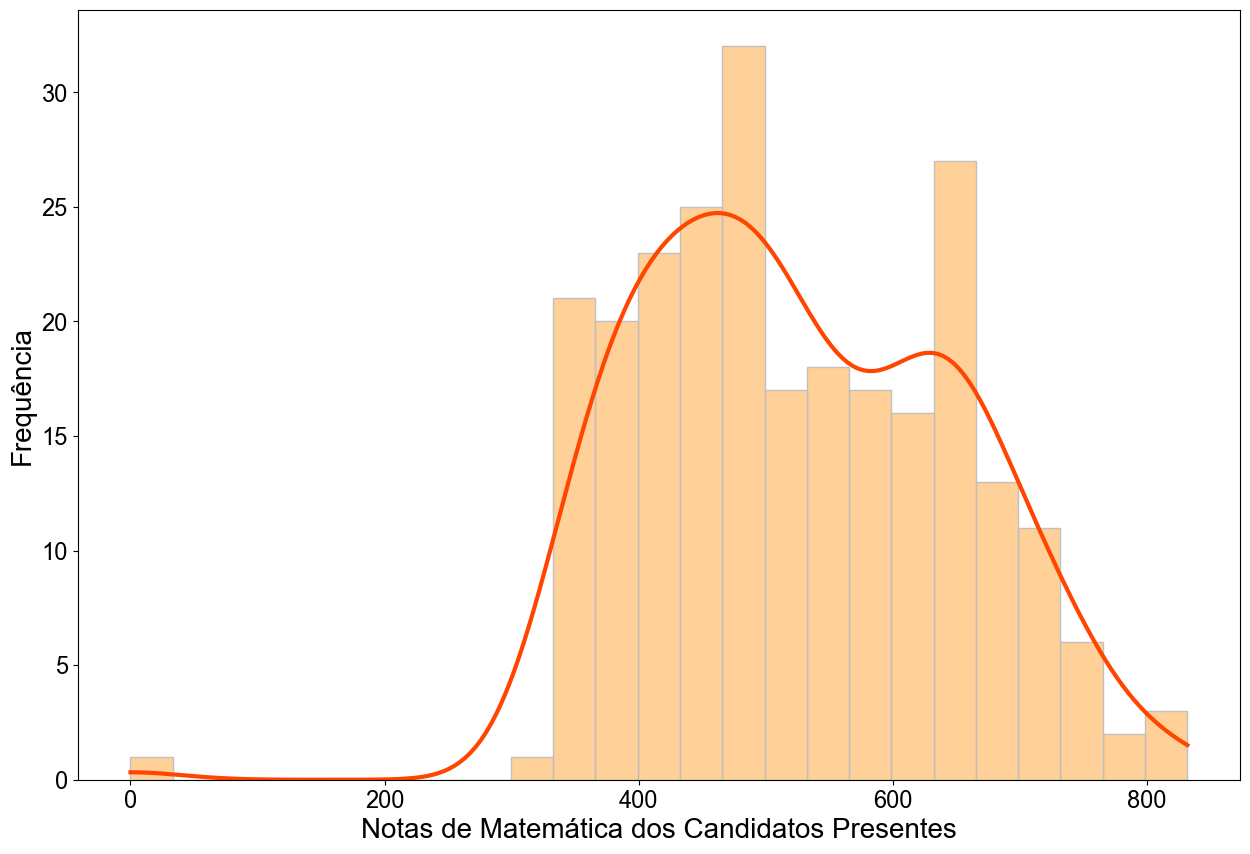

In [427]:
plt.figure(figsize=(15,10))
hist1 = sns.histplot(data=presentes_df_enem_2023['NOTA_MT'], kde=True, bins=25,
                     color = 'darkorange', alpha=0.4, edgecolor='silver',
                     line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Notas de Matemática dos Candidatos Presentes', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

### Verificação estatística da distribuição das notas de matemática

In [428]:
stat, p_value = stats.kstest(presentes_df_enem_2023['NOTA_MT'], 'norm', args=(presentes_df_enem_2023['NOTA_MT'].mean(), presentes_df_enem_2023['NOTA_MT'].std()))

alpha = 0.05
if p_value > alpha:
    print(f"p-valor é {p_value}>{alpha} e, portanto, não há evidências para rejeitar a normalidade das notas de matemática.")
else:
    print(f"p-valor é {p_value}<{alpha} e, portanto, as notas de matemática não seguem uma distribuição normal.")

p-valor é 0.1505336800770335>0.05 e, portanto, não há evidências para rejeitar a normalidade das notas de matemática.


#### Transformação de Box-Cox

Para utilizar um algoritmo de regressão, é necessário que a variável dependente seja aderente a distribuição normal. Assim faremos a transformação de Box-Cox com o intuito de transformar essa variável aderente a distribuição normal.

In [429]:
# Transformação das notas zero em um número muito pequeno para conseguir usar o método
epsilon = 1e-6  # Pequeno deslocamento
nota_mt_corrigida = presentes_df_enem_2023['NOTA_MT'] + epsilon
min(nota_mt_corrigida)

1e-06

In [430]:
# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(nota_mt_corrigida)

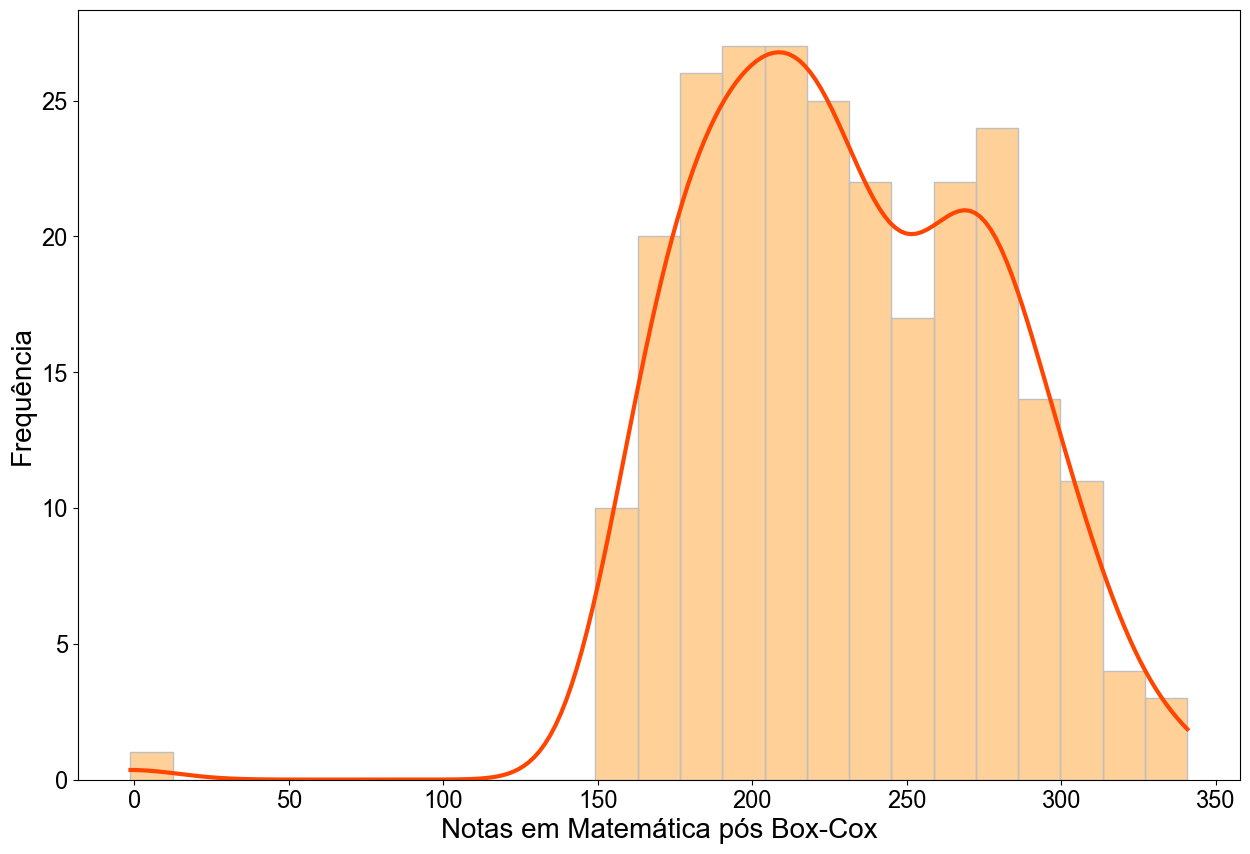

In [431]:
plt.figure(figsize=(15,10))
hist1 = sns.histplot(data=yast, kde=True, bins=25,
                     color = 'darkorange', alpha=0.4, edgecolor='silver',
                     line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Notas em Matemática pós Box-Cox', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()


#### Transformação Logarítmica

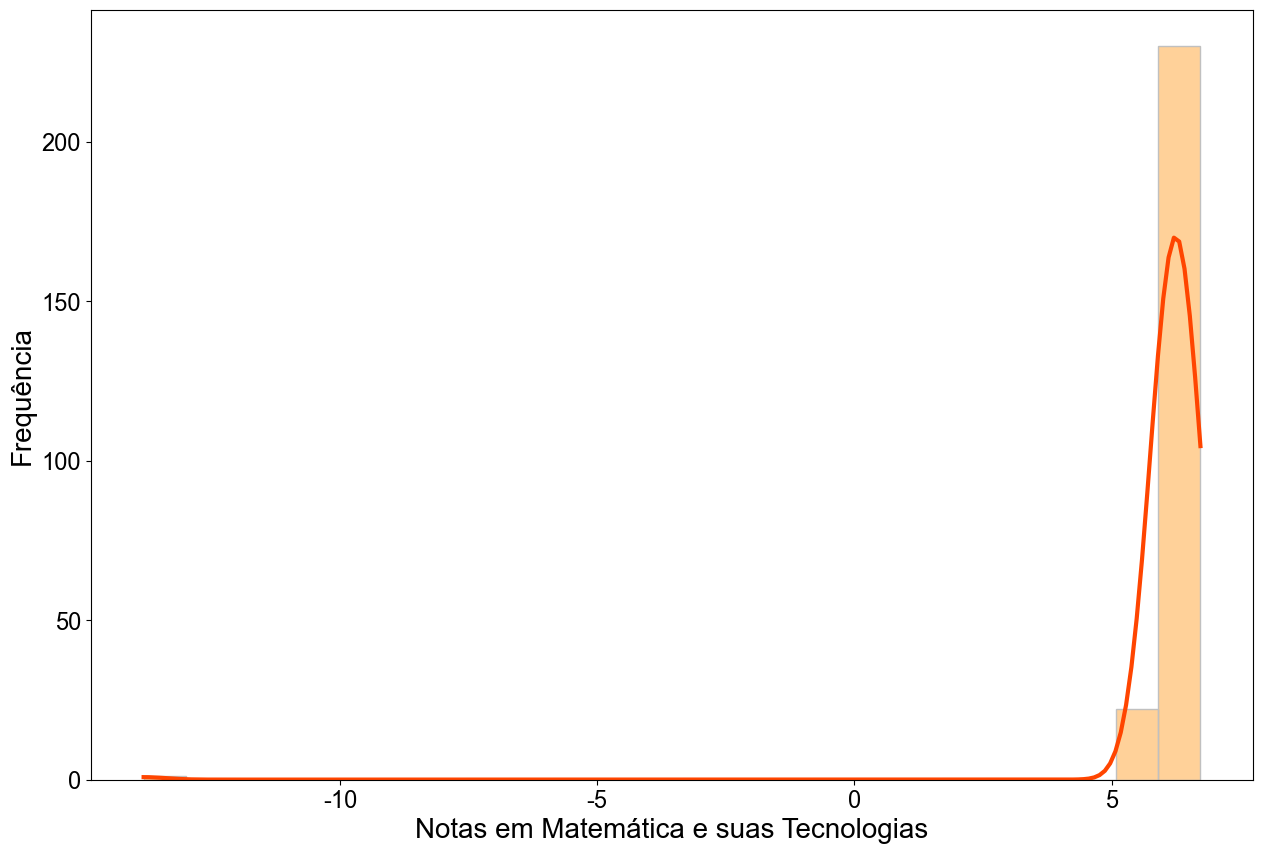

In [432]:
#Grafico de distribuição de frequencia após transformção log 
plt.figure(figsize=(15,10))
hist1 = sns.histplot(data= np.log(nota_mt_corrigida), kde=True, bins=25,
                     color = 'darkorange', alpha=0.4, edgecolor='silver',
                     line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('orangered')
plt.xlabel('Notas em Matemática e suas Tecnologias', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

Visto que de nenhuma das tentativas resultou em distribuição de notas aderentes a curva normal, fica descartada a possibilidade de usar algoritmos de regressão.

In [433]:
# Analisa de as notas de matemática, após Box_cox, são aderentes a distribuição normal
stat_bc, p_value_bc = stats.kstest(yast, 'norm', args=(yast.mean(), yast.std()))

if p_value_bc > alpha:
    print(f"p-valor é {p_value_bc}>{alpha} e, portanto, não há evidências para rejeitar a normalidade dos dados.")
else:
    print(f"p-valor é {p_value_bc}<{alpha} e, portanto, os dados não seguem uma distribuição normal.")

p-valor é 0.2642155679567736>0.05 e, portanto, não há evidências para rejeitar a normalidade dos dados.


Aparentemente há alguma correlação entre renda familiar e outras variáveis socieconômicas. Verificaremos isso a partir da análise de correlação de variáveis

### Boxplot das notas

In [434]:
presentes_df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'REGIAO', 'MEDIA',
       'IS_TOP20'],
      dtype='object')

In [435]:
colunas_notas=['NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO']
colunas_notas_redacao=[ 'NOTA_COMP1_REDACAO','NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO','NOTA_COMP5_REDACAO']

In [436]:
notas_presentes_df_enem_2023=presentes_df_enem_2023[colunas_notas]
notas_redacao_presentes_df_enem_2023=presentes_df_enem_2023[colunas_notas_redacao]

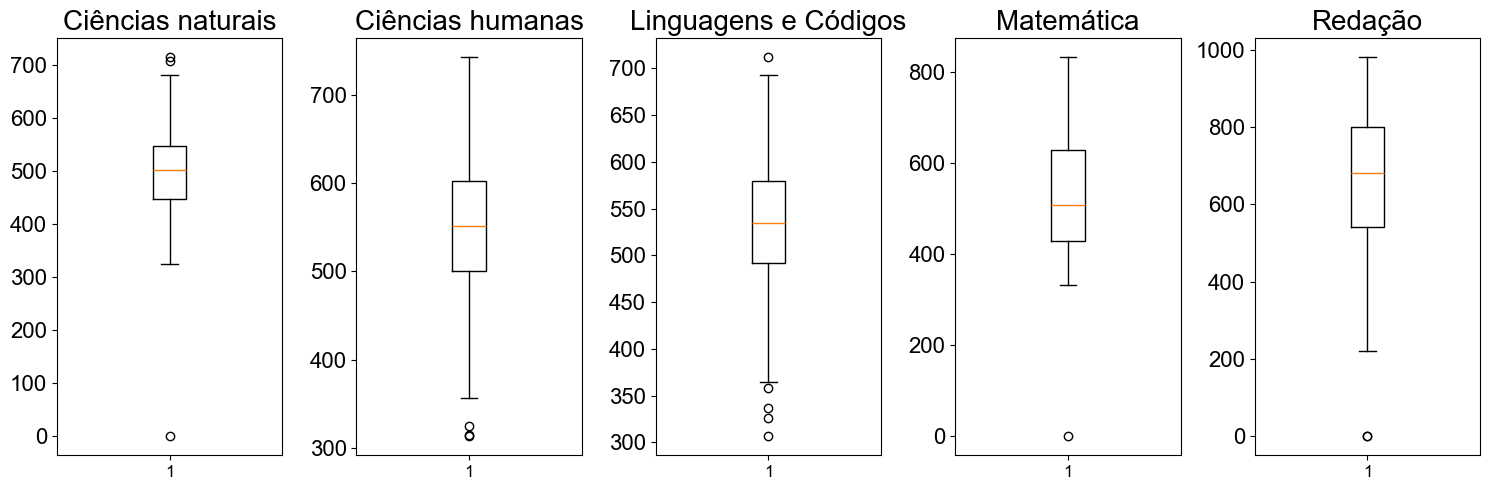

In [437]:
# Criar a figura e os subplots
fig, axes = plt.subplots(1, len(colunas_notas), figsize=(15, 5))
nomes_display={'NOTA_CN': 'Ciências naturais', 'NOTA_CH':'Ciências humanas', 'NOTA_LC': 'Linguagens e Códigos', 'NOTA_MT':'Matemática', 'NOTA_REDACAO':'Redação'}
# Gerar um boxplot para cada coluna
for i, coluna in enumerate(notas_presentes_df_enem_2023.columns):
    # Usando matplotlib
    axes[i].boxplot(notas_presentes_df_enem_2023[coluna])
    titulo = nomes_display.get(coluna, coluna)
    axes[i].set_title(titulo)

plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()


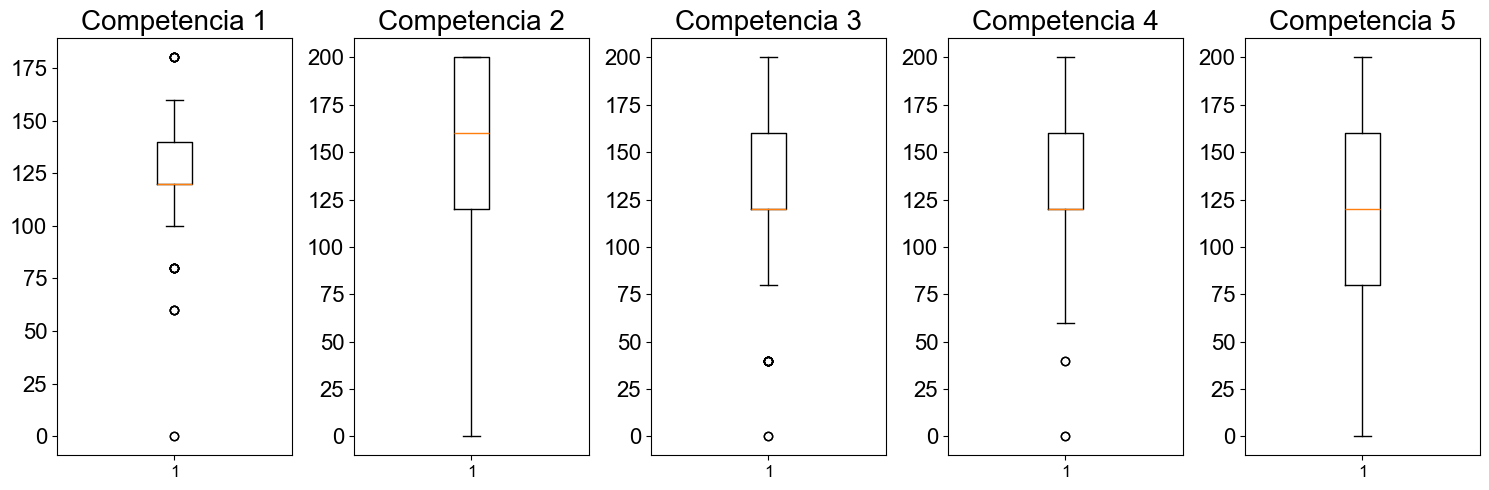

In [438]:
# Criar a figura e os subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
nomes_display={'NOTA_COMP1_REDACAO': 'Competencia 1',
               'NOTA_COMP2_REDACAO': 'Competencia 2',
               'NOTA_COMP3_REDACAO': 'Competencia 3',
               'NOTA_COMP4_REDACAO': 'Competencia 4',
               'NOTA_COMP5_REDACAO': 'Competencia 5'}
    # Gerar um boxplot para cada coluna
for i, coluna in enumerate(notas_redacao_presentes_df_enem_2023.columns):
    # Usando matplotlib
    axes[i].boxplot(notas_redacao_presentes_df_enem_2023[coluna])
    titulo = nomes_display.get(coluna, coluna)
    axes[i].set_title(titulo)
    
    # Alternativamente, usando seaborn (descomente as linhas abaixo)
    # sns.boxplot(data=df, y=coluna, ax=axes[i])
    # axes[i].set_title(coluna)
    # axes[i].set_xlabel('')  # Remove o label do eixo x

plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()

In [439]:
presentes_df_enem_2023['REGIAO'].value_counts().index.to_list()

['Desconhecido', 'Nordeste', 'Sudeste', 'Norte', 'Sul', 'Centro_Oeste']

### Correlação entre as notas

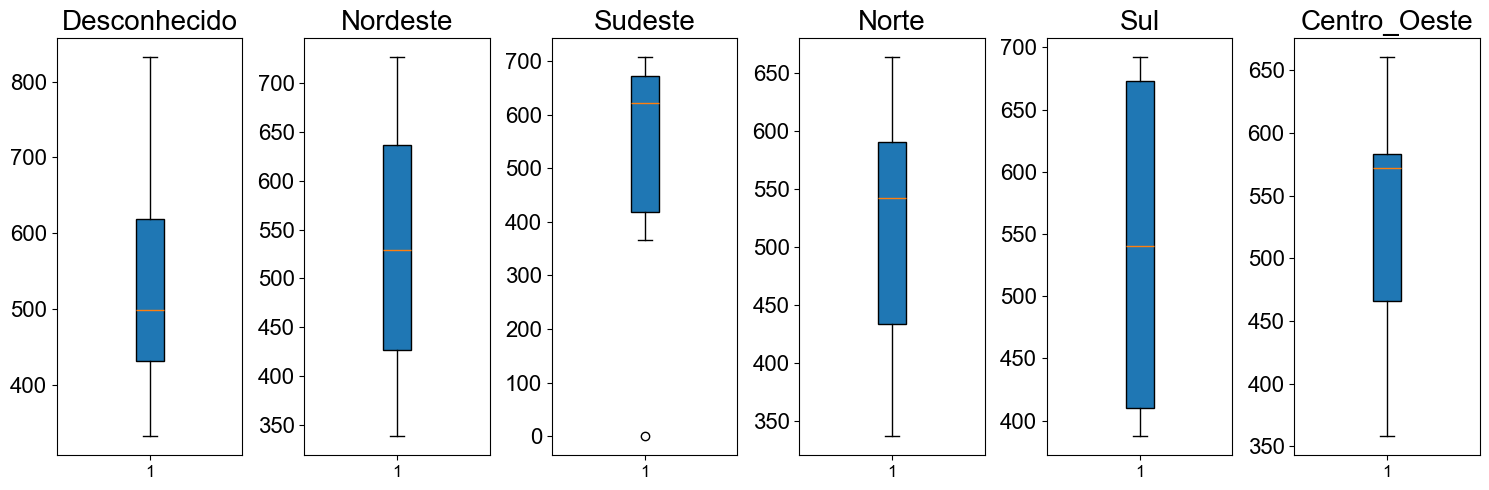

In [440]:
#Box_plot da nota de matemática por região 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']  # Especifica Arial como a fonte sans-serif
plt.rcParams['axes.unicode_minus'] = False  # Para evitar problemas com símbolo de negativo
params = {
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.labelsize': 12,
    'ytick.labelsize': 16,
    'legend.fontsize': 12
}
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i, coluna in enumerate(presentes_df_enem_2023['REGIAO'].value_counts().index.to_list()):
    df_regiao=presentes_df_enem_2023[presentes_df_enem_2023['REGIAO']==coluna]
    axes[i].boxplot(df_regiao['NOTA_MT'], vert=True, patch_artist=True)
    axes[i].set_title(coluna)
plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()

In [441]:
df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA', 'IS_TOP20'],
      dtype='object')

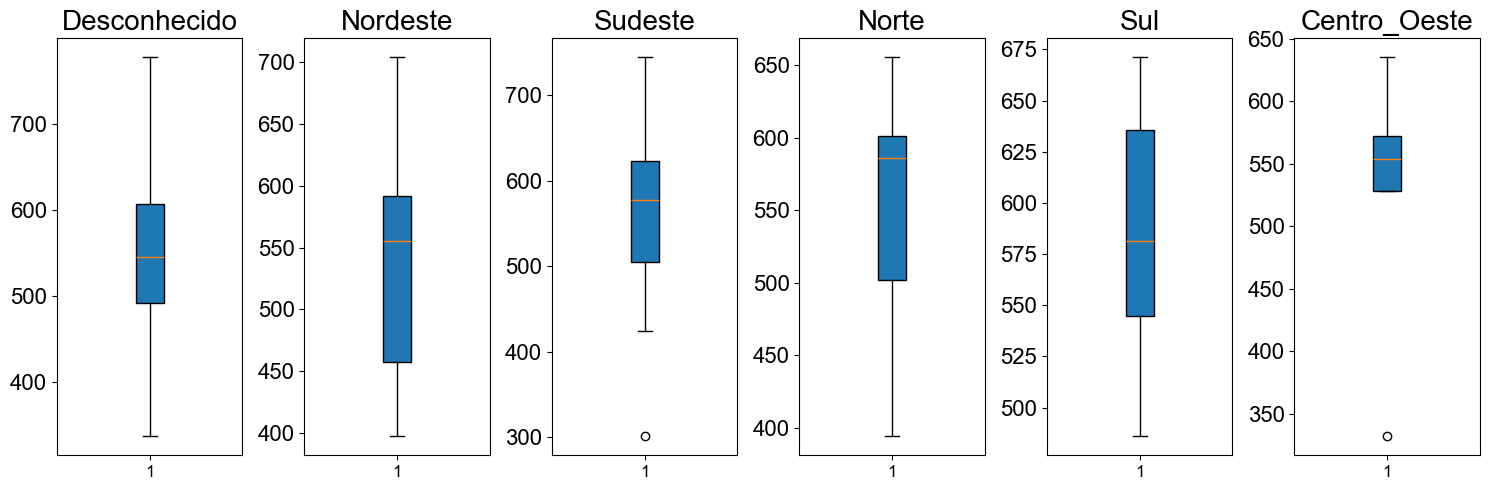

In [442]:
#Box_plot da nota final por região 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']  # Especifica Arial como a fonte sans-serif
plt.rcParams['axes.unicode_minus'] = False  # Para evitar problemas com símbolo de negativo
params = {
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.labelsize': 12,
    'ytick.labelsize': 16,
    'legend.fontsize': 12
}
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i, coluna in enumerate(presentes_df_enem_2023['REGIAO'].value_counts().index.to_list()):
    df_regiao=presentes_df_enem_2023[presentes_df_enem_2023['REGIAO']==coluna]
    axes[i].boxplot(df_regiao['MEDIA'], vert=True, patch_artist=True)
    axes[i].set_title(coluna)
plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()

In [443]:
presentes_df_enem_2023[['NOTA_MT','NOTA_COMP1_REDACAO','NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO','NOTA_COMP5_REDACAO']]

,NOTA_MT,NOTA_COMP1_REDACAO,NOTA_COMP2_REDACAO,NOTA_COMP3_REDACAO,NOTA_COMP4_REDACAO,NOTA_COMP5_REDACAO
2,363.2,140.0,200.0,100.0,120.0,140.0
3,466.7,140.0,200.0,160.0,180.0,200.0
4,338.3,120.0,120.0,120.0,120.0,80.0
9,680.2,120.0,120.0,120.0,120.0,120.0
10,736.3,140.0,200.0,160.0,160.0,200.0
...,...,...,...,...,...,...
392,637.8,120.0,160.0,120.0,140.0,140.0
395,600.6,120.0,120.0,120.0,120.0,120.0
397,415.5,140.0,180.0,160.0,140.0,120.0
398,523.1,120.0,120.0,100.0,120.0,60.0


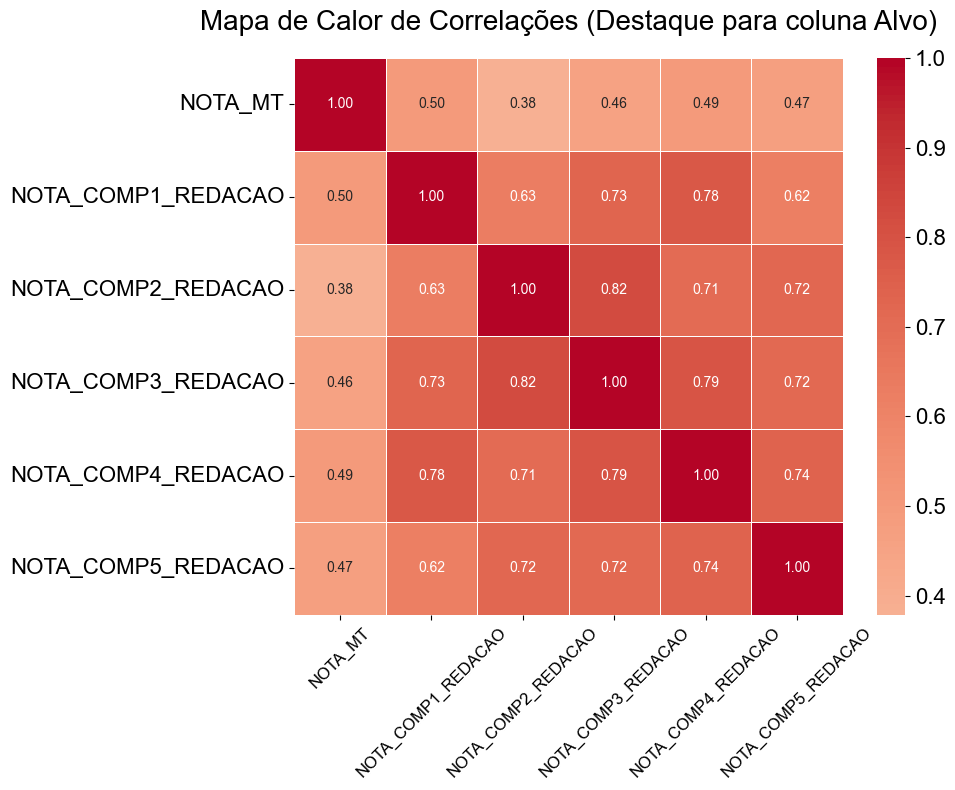

In [444]:
# Calcular matriz de correlação entre as competencias de redação
corr = presentes_df_enem_2023[['NOTA_MT','NOTA_COMP1_REDACAO','NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO','NOTA_COMP5_REDACAO']].corr()

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            annot_kws={"size": 10}, linewidths=.5)

# Destacar a coluna 'Alvo' com um retângulo
#ax = plt.gca()
#target_index = corr.columns.get_loc('Alvo')
#ax.add_patch(plt.Rectangle((0, target_index), len(corr), 1, 
                          #fill=False, edgecolor='yellow', lw=3, clip_on=False))
#ax.add_patch(plt.Rectangle((target_index, 0), 1, len(corr), 
                          #fill=False, edgecolor='yellow', lw=3, clip_on=False))

plt.title('Mapa de Calor de Correlações (Destaque para coluna Alvo)', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [445]:
#Correlação entre a nota de matemática e as notas nas habilidades específicas em redação
corr['NOTA_MT']

NOTA_MT               1.000000
NOTA_COMP1_REDACAO    0.497010
NOTA_COMP2_REDACAO    0.378726
NOTA_COMP3_REDACAO    0.460943
NOTA_COMP4_REDACAO    0.494612
NOTA_COMP5_REDACAO    0.472211
Name: NOTA_MT, dtype: float64

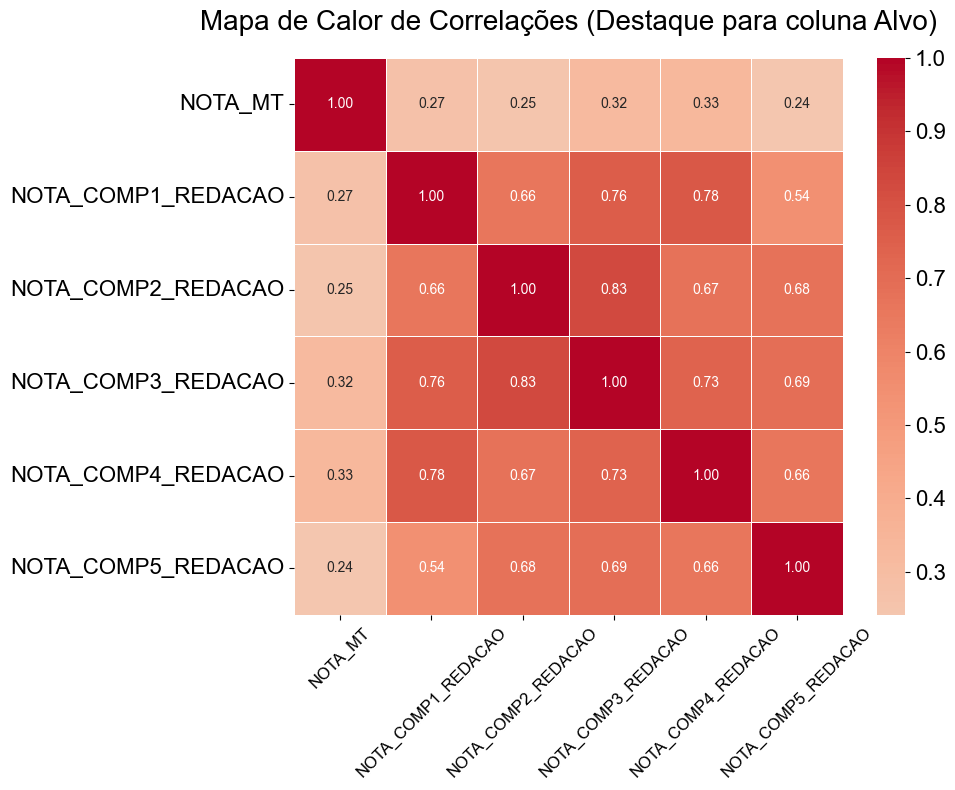

In [446]:
# Calcular matriz de correlação notas de redação entre top20
corr_top20 = top_20[['NOTA_MT','NOTA_COMP1_REDACAO','NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO','NOTA_COMP5_REDACAO']].corr()

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_top20, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            annot_kws={"size": 10}, linewidths=.5)

# Destacar a coluna 'Alvo' com um retângulo
#ax = plt.gca()
#target_index = corr.columns.get_loc('Alvo')
#ax.add_patch(plt.Rectangle((0, target_index), len(corr), 1, 
                          #fill=False, edgecolor='yellow', lw=3, clip_on=False))
#ax.add_patch(plt.Rectangle((target_index, 0), 1, len(corr), 
                          #fill=False, edgecolor='yellow', lw=3, clip_on=False))

plt.title('Mapa de Calor de Correlações (Destaque para coluna Alvo)', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [447]:
#Correlação entre a nota de matemática dos top20 e as notas nas habilidades específicas em redação
corr_top20['NOTA_MT']

NOTA_MT               1.000000
NOTA_COMP1_REDACAO    0.269162
NOTA_COMP2_REDACAO    0.250116
NOTA_COMP3_REDACAO    0.315223
NOTA_COMP4_REDACAO    0.331922
NOTA_COMP5_REDACAO    0.241342
Name: NOTA_MT, dtype: float64

### Correlação entre variáveis socieconômicas

In [448]:
colunas_corr=['ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET']

In [449]:
dict_corr={'variavel':[],'p-valor':[],'Qui2':[],'V Cramer':[]}
for cat in colunas_corr:
    tabela_contingencia = pd.crosstab(presentes_df_enem_2023['RENDA_FAMILIAR'], presentes_df_enem_2023[cat])
    chi2, p, dof, expected = stats.chi2_contingency(tabela_contingencia)
    phi2 = chi2 / tabela_contingencia.sum().sum()
    n_linhas, n_colunas = tabela_contingencia.shape
    cramer= (phi2/min(n_linhas,n_colunas))
    dict_corr['variavel'].append(cat)
    dict_corr['p-valor'].append(p)
    dict_corr['Qui2'].append(chi2)
    dict_corr['V Cramer'].append(cramer)
pd.DataFrame(dict_corr).sort_values(by='V Cramer',ascending=False).reset_index()

KeyError: 'POSSUI_DIARISTA'

Dentre as características socieconômicas, todas as consideradas no trabalho estão associadas com a renda familiar e, portanto, reduziremos essas variáveis a apenas a que diz respeito a renda familiar e escolaridade paterna e materna.

In [ ]:
presentes_df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'POSSUI_DIARISTA',
       'QTD_BANHEIROS', 'QTD_CARROS', 'QTD_GELADEIRA', 'QTD_TV_COLORIDA',
       'QTD_COMPUTADOR', 'ACESSO_INTERNET', 'REGIAO', 'MEDIA', 'IS_TOP20'],
      dtype='object')

In [ ]:
presentes_df_enem_2023=presentes_df_enem_2023.drop(columns= ['POSSUI_DIARISTA',
                                                            'QTD_BANHEIROS',
                                                            'QTD_CARROS', 
                                                            'QTD_GELADEIRA', 
                                                            'QTD_TV_COLORIDA',       
                                                            'QTD_COMPUTADOR', 'ACESSO_INTERNET'])

In [ ]:
presentes_df_enem_2023.columns

Index(['INSCRICAO', 'FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR',
       'NACIONALIDADE', 'ST_CONCLUSAO', 'ANO_CONCLUSAO', 'MUNICIPIO', 'UF',
       'ADM_ESC', 'TP_URBANA_RURAL', 'PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO', 'ESCOLARIDADE_PATERNA',
       'ESCOLARIDADE_MATERNA', 'RENDA_FAMILIAR', 'REGIAO', 'MEDIA',
       'IS_TOP20'],
      dtype='object')

# Dumização das variáveis

In [450]:
colunas_dummies=['FAIXA_ETARIA', 
                'SEXO', 
                'COR', 
                'NACIONALIDADE',
                'REGIAO',       
                'ADM_ESC', 
                'TP_URBANA_RURAL', 
                'ESCOLARIDADE_PATERNA',       
                'ESCOLARIDADE_MATERNA', 
                'RENDA_FAMILIAR']


In [451]:
dados_analise=presentes_df_enem_2023[['INSCRICAO','FAIXA_ETARIA', 
                'SEXO', 
                'COR', 
                'NACIONALIDADE',
                'REGIAO',       
                'ADM_ESC', 
                'TP_URBANA_RURAL', 
                'ESCOLARIDADE_PATERNA',       
                'ESCOLARIDADE_MATERNA', 
                'RENDA_FAMILIAR', 'IS_TOP20']]

In [452]:
dados_analise.head()

,INSCRICAO,FAIXA_ETARIA,SEXO,COR,NACIONALIDADE,REGIAO,ADM_ESC,TP_URBANA_RURAL,ESCOLARIDADE_PATERNA,ESCOLARIDADE_MATERNA,RENDA_FAMILIAR,IS_TOP20
2,210061103945,21,Feminino,Branca,Brasileiro,Desconhecido,Desconhecido,Desconhecido,nao_sabe_responder,ensino_medio_completo,renda_1320_1980,0
3,210060214087,17,Feminino,Parda,Brasileiro,Nordeste,Publica,urbana,ensino_medio_incompleto,ensino_medio_incompleto,renda_1320_1980,0
4,210059980948,18,Feminino,Parda,Brasileiro,Nordeste,Publica,urbana,4ano_incompleto,4ano_incompleto,renda_ate_1320,0
9,210060801601,26_30,Masculino,Branca,Brasileiro,Desconhecido,Desconhecido,Desconhecido,nao_sabe_responder,ensino_medio_completo,renda_3300_3960,1
10,210059085130,23,Masculino,Parda,Brasileiro,Desconhecido,Desconhecido,Desconhecido,ensino_superior,9ano_incompleto,renda_ate_1320,1


In [453]:
presentes_df_enem_2023_dummies = pd.get_dummies(dados_analise, columns=colunas_dummies, drop_first=True)

In [454]:
presentes_df_enem_2023_dummies.columns

Index(['INSCRICAO', 'IS_TOP20', 'FAIXA_ETARIA_18', 'FAIXA_ETARIA_19',
       'FAIXA_ETARIA_20', 'FAIXA_ETARIA_21', 'FAIXA_ETARIA_22',
       'FAIXA_ETARIA_23', 'FAIXA_ETARIA_24', 'FAIXA_ETARIA_25',
       'FAIXA_ETARIA_26_30', 'FAIXA_ETARIA_31_35', 'FAIXA_ETARIA_36_40',
       'FAIXA_ETARIA_41_45', 'FAIXA_ETARIA_46_50', 'FAIXA_ETARIA_56_60',
       'SEXO_Masculino', 'COR_Branca', 'COR_Indígena', 'COR_Nao_declarado',
       'COR_Parda', 'COR_Preta',
       'NACIONALIDADE_Brasileiro_Nato_nascido_no_exterior',
       'NACIONALIDADE_Brasileiro_Naturalizado', 'NACIONALIDADE_Nao_informado',
       'REGIAO_Nordeste', 'REGIAO_Norte', 'REGIAO_Sudeste', 'REGIAO_Sul',
       'REGIAO_Desconhecido', 'ADM_ESC_Privada', 'ADM_ESC_Publica',
       'ADM_ESC_Desconhecido', 'TP_URBANA_RURAL_Desconhecido',
       'ESCOLARIDADE_PATERNA_9ano_incompleto',
       'ESCOLARIDADE_PATERNA_ensino_medio_completo',
       'ESCOLARIDADE_PATERNA_ensino_medio_incompleto',
       'ESCOLARIDADE_PATERNA_ensino_superior',
 

# Ensemble Models

In [455]:
#Dicionário para armazenar métricas de eficácia dos modelos
dict_modelos={'Modelo': [], 'Acuracia': [], 'Acuracia Balanceada': [],  'AUC': [], 'GINI': []}

## Dados de Treino e Teste

In [456]:
presentes_df_enem_2023_dummies.columns

Index(['INSCRICAO', 'IS_TOP20', 'FAIXA_ETARIA_18', 'FAIXA_ETARIA_19',
       'FAIXA_ETARIA_20', 'FAIXA_ETARIA_21', 'FAIXA_ETARIA_22',
       'FAIXA_ETARIA_23', 'FAIXA_ETARIA_24', 'FAIXA_ETARIA_25',
       'FAIXA_ETARIA_26_30', 'FAIXA_ETARIA_31_35', 'FAIXA_ETARIA_36_40',
       'FAIXA_ETARIA_41_45', 'FAIXA_ETARIA_46_50', 'FAIXA_ETARIA_56_60',
       'SEXO_Masculino', 'COR_Branca', 'COR_Indígena', 'COR_Nao_declarado',
       'COR_Parda', 'COR_Preta',
       'NACIONALIDADE_Brasileiro_Nato_nascido_no_exterior',
       'NACIONALIDADE_Brasileiro_Naturalizado', 'NACIONALIDADE_Nao_informado',
       'REGIAO_Nordeste', 'REGIAO_Norte', 'REGIAO_Sudeste', 'REGIAO_Sul',
       'REGIAO_Desconhecido', 'ADM_ESC_Privada', 'ADM_ESC_Publica',
       'ADM_ESC_Desconhecido', 'TP_URBANA_RURAL_Desconhecido',
       'ESCOLARIDADE_PATERNA_9ano_incompleto',
       'ESCOLARIDADE_PATERNA_ensino_medio_completo',
       'ESCOLARIDADE_PATERNA_ensino_medio_incompleto',
       'ESCOLARIDADE_PATERNA_ensino_superior',
 

In [457]:
X=presentes_df_enem_2023.drop(columns = ['INSCRICAO','PRESENCA_CH_LC', 'PRESENCA_MT_CN',
       'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_COMP1_REDACAO',
       'NOTA_COMP2_REDACAO', 'NOTA_COMP3_REDACAO', 'NOTA_COMP4_REDACAO',
       'NOTA_COMP5_REDACAO', 'NOTA_REDACAO','MEDIA',
       'IS_TOP20'])

In [458]:
X_dum = presentes_df_enem_2023_dummies.drop(columns = ['INSCRICAO','IS_TOP20'])

In [459]:
y=presentes_df_enem_2023['IS_TOP20']

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [461]:
X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X_dum, y, test_size=0.2, random_state=42, stratify=y)

In [462]:
y_train.value_counts()

IS_TOP20
0    161
1     41
Name: count, dtype: int64

In [463]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 161 to 378
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   FAIXA_ETARIA          202 non-null    category
 1   SEXO                  202 non-null    category
 2   ESTADO_CIVIL          202 non-null    category
 3   COR                   202 non-null    category
 4   NACIONALIDADE         202 non-null    category
 5   ST_CONCLUSAO          202 non-null    category
 6   ANO_CONCLUSAO         202 non-null    category
 7   MUNICIPIO             202 non-null    category
 8   UF                    202 non-null    category
 9   ADM_ESC               202 non-null    category
 10  TP_URBANA_RURAL       202 non-null    category
 11  ESCOLARIDADE_PATERNA  202 non-null    category
 12  ESCOLARIDADE_MATERNA  202 non-null    category
 13  RENDA_FAMILIAR        202 non-null    category
 14  REGIAO                202 non-null    category
dtypes: catego

## Random Forest

In [464]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 161 to 378
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   FAIXA_ETARIA          202 non-null    category
 1   SEXO                  202 non-null    category
 2   ESTADO_CIVIL          202 non-null    category
 3   COR                   202 non-null    category
 4   NACIONALIDADE         202 non-null    category
 5   ST_CONCLUSAO          202 non-null    category
 6   ANO_CONCLUSAO         202 non-null    category
 7   MUNICIPIO             202 non-null    category
 8   UF                    202 non-null    category
 9   ADM_ESC               202 non-null    category
 10  TP_URBANA_RURAL       202 non-null    category
 11  ESCOLARIDADE_PATERNA  202 non-null    category
 12  ESCOLARIDADE_MATERNA  202 non-null    category
 13  RENDA_FAMILIAR        202 non-null    category
 14  REGIAO                202 non-null    category
dtypes: catego

In [465]:
modelo_rf = RandomForestClassifier(n_estimators=50, random_state=42)
modelo_rf.fit(X_train_dum, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [466]:
# Calcular as classificações preditas
y_pred_modelo_rf = modelo_rf.predict(X_test_dum)

In [467]:
# Calcular a probabilidade de evento
p_test = modelo_rf.predict_proba(X_test_dum)[:, -1]
p_train = modelo_rf.predict_proba(X_train_dum)[:, -1]

In [468]:
y_test.shape

(51,)

In [469]:
y_pred_modelo_rf.shape

(51,)

### Avaliando o 1º modelo

In [470]:
# Calculando acurácia e matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_modelo_rf)
ac_rf = accuracy_score(y_test, y_pred_modelo_rf)
bac_rf = balanced_accuracy_score(y_test, y_pred_modelo_rf)
auc_score_rf = roc_auc_score(y_test, p_test)

In [471]:
dict_modelos={'Modelo': [], 'Acuracia': [], 'Acuracia Balanceada': [],  'AUC': [], 'GINI': []}

In [472]:
dict_modelos['Modelo'].append('1ª Random Forest')
dict_modelos['Acuracia'].append(ac_rf)
dict_modelos['Acuracia Balanceada'].append(bac_rf)
dict_modelos['AUC'].append(auc_score_rf)
dict_modelos['GINI'].append(2*auc_score_rf-1)

In [473]:
dict_modelos

{'Modelo': ['1ª Random Forest'],
 'Acuracia': [0.7843137254901961],
 'Acuracia Balanceada': [0.5634146341463415],
 'AUC': [0.474390243902439],
 'GINI': [-0.051219512195122]}

In [474]:
pd.DataFrame(dict_modelos)

,Modelo,Acuracia,Acuracia Balanceada,AUC,GINI
0,1ª Random Forest,0.784314,0.563415,0.47439,-0.05122


#### Curva ROC 1º modelo

In [475]:
auc_train = roc_auc_score(y_train, p_train)
auc_test = roc_auc_score(y_test, p_test)

In [476]:
fpr_train, tpr_train, _ = roc_curve(y_train, p_train)
fpr_test, tpr_test, _ = roc_curve(y_test, p_test)


In [477]:
# Gerar a Curva ROC    
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, p_train)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, p_test)

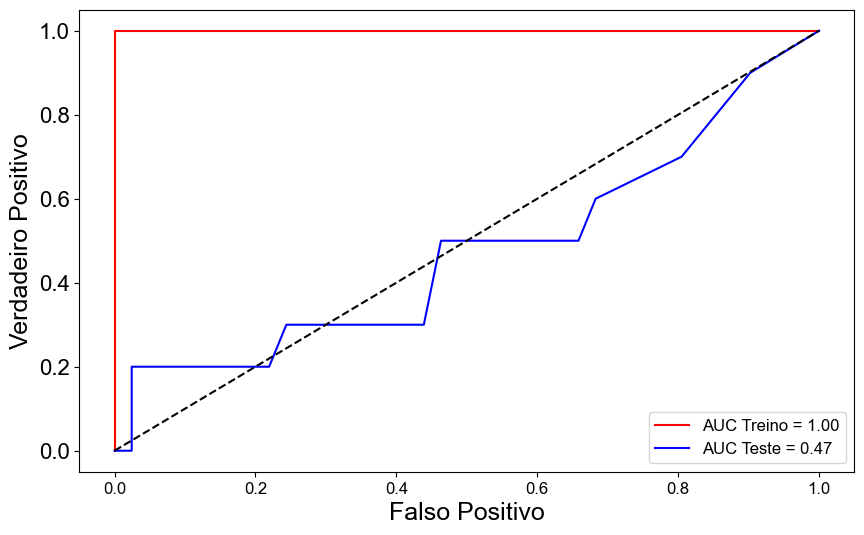

In [478]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='red', label=f'AUC Treino = {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='blue', label=f'AUC Teste = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
#plt.title('Curva ROC')
plt.legend()
plt.show()

### Otimizador RandomizedSearchCV

### Carregar melhor random forest

In [479]:
#Melhor modelo com todos os dados
#with open('G:\\Meu Drive\\ciencia de dados\\Pos\\TCC\\TCC\\random_forest_final.pkl', 'rb') as file:
#    final_clf = pickle.load(file)

### Treino modelo RandomizedSearchCV

In [480]:
#%% Definir o espaço de hiperparâmetros para Random Forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Número de árvores
    'max_depth': range(2, 30, 1),      # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],      # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],        # Número mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2', None],  # Número de features consideradas para divisão (a raiz da amostra ou log da amostra)
    'bootstrap': [True, False],           # Usar bootstrap ou não
    'criterion': ['gini', 'entropy'],     # Critério de divisão
    'ccp_alpha': np.linspace(0, 0.05, 20)  # Parâmetro de poda de complexidade de custo
}

In [481]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [482]:
#%% Configurar o RandomizedSearchCV
n_iter = 50  # Número de combinações de hiperparâmetros a serem testadas
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold estratificado
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=n_iter, #Quantidade de Interações
    cv=kf, #Estratégia de validação cruzada definido anterioremente
    scoring='roc_auc',
    n_jobs=-1,  # Usar todos os núcleos do processador
    verbose=1,  # Mostrar progresso
    random_state=42
)

In [483]:
random_search.fit(X_train_dum, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': array([0.        , 0.00263158, 0.00526316, 0.00789474, 0.01052632,
       0.01315789, 0.01578947, 0.01842105, 0.02105263, 0.02368421,
       0.02631579, 0.02894737, 0.03157895, 0.03421053, 0.03684211,
       0.03947368, 0.04210526, 0.04473684, 0.04736842, 0.05      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [484]:
print(f"\nMelhores hiperparâmetros: {random_search.best_params_}")
print(f"\nAUC média na validação cruzada: {random_search.best_score_:.4f}")


Melhores hiperparâmetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 28, 'criterion': 'entropy', 'ccp_alpha': 0.021052631578947368, 'bootstrap': False}

AUC média na validação cruzada: 0.7304


In [485]:
#%% Treinar o modelo final com os melhores hiperparâmetros
final_clf = random_search.best_estimator_ #treina a arvores com os melhores parametros

### Avaliando modelo com RandomizedSearch

In [486]:
# Probabilidades da classe positiva
y_probs_rf_best = final_clf.predict_proba(X_test_dum)[:, 1]

In [487]:
# Previsões binárias (threshold = 0.5)
y_pred_rf_best = (y_probs_rf_best >= 0.5).astype(int)

In [488]:
# Determinando medidas de desempenho do modelo
acuracia_rf_best = accuracy_score(y_test, y_pred_rf_best)
precisao_rf_best = precision_score(y_test, y_pred_rf_best)
acuracia_balanceada_rf_best = balanced_accuracy_score(y_test, y_pred_rf_best)
auc_rf_best = roc_auc_score(y_test, y_probs_rf_best)
gini_rf_best = 2 * auc_rf_best - 1

c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [489]:
# Adicionando medidas de desempenho no dict_modelos
dict_modelos['Modelo'].append('Random Forest Best')
dict_modelos['Acuracia'].append(acuracia_rf_best)
dict_modelos['Acuracia Balanceada'].append(acuracia_balanceada_rf_best)
dict_modelos['AUC'].append(auc_rf_best)
dict_modelos['GINI'].append(gini_rf_best)

In [490]:
dict_modelos

{'Modelo': ['1ª Random Forest', 'Random Forest Best'],
 'Acuracia': [0.7843137254901961, 0.803921568627451],
 'Acuracia Balanceada': [0.5634146341463415, 0.5],
 'AUC': [0.474390243902439, 0.4951219512195122],
 'GINI': [-0.051219512195122, -0.009756097560975618]}

### Curva ROC Random Forest

In [491]:
search_fpr_rf, search_tpr_rf, search_thresholds_rf = roc_curve(y_test, y_probs_rf_best)

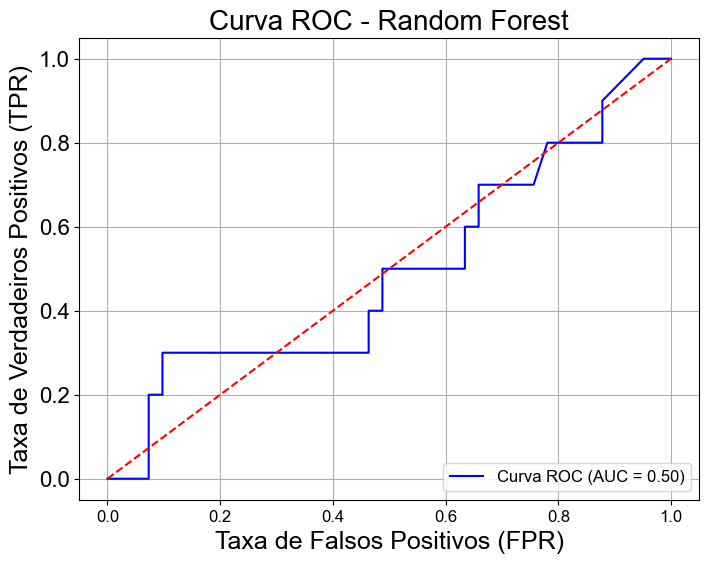

In [492]:
# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(search_fpr_rf, search_tpr_rf, color='blue', label=f'Curva ROC (AUC = {auc_rf_best:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (modelo aleatório)
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title(f"Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Salvando melhor modelo

In [493]:
# import pickle

In [494]:
# Salva o melhor modelo
#with open('G:\\Meu Drive\\ciencia de dados\\Pos\\TCC\\TCC\\random_forest_final.pkl', 'wb') as file:
    pickle.dump(final_clf, file)


IndentationError: unexpected indent (3771555682.py, line 3)

### Importância das variáveis

Importância das variáveis baseada na diminuição da impureza do nó.

In [495]:
explainer_rf = shap.TreeExplainer(modelo_rf)

In [496]:
shap_values_rf = explainer_rf.shap_values(X_test_dum)

<Figure size 640x480 with 0 Axes>

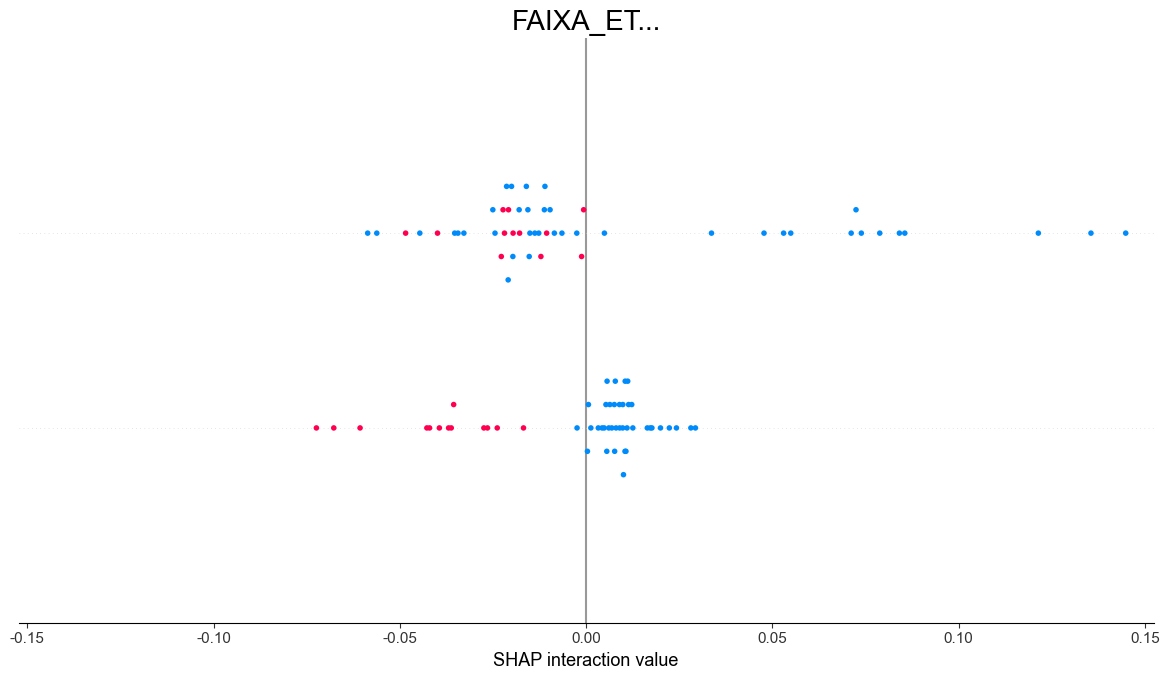

In [497]:
shap.summary_plot(shap_values_rf, X_test_dum, feature_names=X_test_dum.columns, plot_type="bar")

## LightGBM


In [500]:
import lightgbm as lgbm
from skopt import BayesSearchCV

### Otimizador BayesSearch

In [501]:
# Criando um classificador base
lgbm_clf = lgbm.LGBMClassifier(boosting_type='gbdt', 
                               objective='binary', 
                               random_state=42)

In [502]:
# Criando o espaço de busca para o otimizador
param_grid = {
    'num_leaves': (20, 21),  # Número de folhas na árvore de decisão
    'max_depth': (3, 15),  # Profundidade máxima da árvore
    'learning_rate': (0.01, 0.3, 'log-uniform'),  # Taxa de aprendizado
    'n_estimators': (1, 3),  # Número de árvores
    'subsample': (0.5, 1.0),  # Proporção de amostras usadas em cada árvore
    'colsample_bytree': (0.5, 1.0),  # Fração de colunas a serem usadas por árvore
    'reg_alpha': (1e-5, 1.0, 'log-uniform'),  # Regularização L1
    'reg_lambda': (1e-5, 1.0, 'log-uniform'),  # Regularização L2
}

In [503]:
# Criando o otimizador Bayesiano
bayes_search = BayesSearchCV(
    estimator=lgbm_clf,  # Modelo a ser otimizado
    search_spaces=param_grid,  # Espaço de busca definido acima
    scoring='roc_auc',  # Critério de seleção: Área sob a curva ROC (AUC)
    n_iter=10,  # Número de avaliações do modelo
    cv=3,  # Validação cruzada com 5 folds
    random_state=42,
    n_jobs=-1,  # Paralelização total dos cálculos
    verbose=0
)


### Treinando o modelo

In [504]:
# Treinando o modelo
bayes_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 41, number of negative: 161
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 202, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202970 -> initscore=-1.367832
[LightGBM] [Info] Start training from score -1.367832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


BayesSearchCV(cv=3,
              estimator=LGBMClassifier(objective='binary', random_state=42),
              n_iter=10, n_jobs=-1, random_state=42, scoring='roc_auc',
              search_spaces={'colsample_bytree': (0.5, 1.0),
                             'learning_rate': (0.01, 0.3, 'log-uniform'),
                             'max_depth': (3, 15), 'n_estimators': (1, 3),
                             'num_leaves': (20, 21),
                             'reg_alpha': (1e-05, 1.0, 'log-uniform'),
                             'reg_lambda': (1e-05, 1.0, 'log-uniform'),
                             'subsample': (0.5, 1.0)})

In [505]:
# Melhores estimadores usando o otimizador Bayes
best_model_bayes = bayes_search.best_estimator_
best_model_bayes


LGBMClassifier(colsample_bytree=0.7224162561505759,
               learning_rate=0.22754356809600707, max_depth=4, n_estimators=2,
               num_leaves=20, objective='binary', random_state=42,
               reg_alpha=0.0018549265568739584,
               reg_lambda=5.987427535052461e-05, subsample=0.8757762656702482)

### Avaliando o modelo com melhores parâmetros

In [506]:
# Probabilidades da classe positiva
y_probs_lgbm = best_model_bayes.predict_proba(X_test)[:, 1]

In [507]:
# Previsões binárias (threshold = 0.5)
y_pred_lgbm = (y_probs_lgbm >= 0.5).astype(int)

In [508]:
# Determinando medidas de desempenho do modelo
acuracia_lgbm = accuracy_score(y_test, y_pred_lgbm)
precisao_lgbm = precision_score(y_test, y_pred_lgbm)
acuracia_balanceada_lgbm = balanced_accuracy_score(y_test, y_pred_lgbm)
auc_lgbm = roc_auc_score(y_test, y_probs_lgbm)
gini_lgbm = 2 * auc_lgbm - 1


c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [509]:
# Adicionando medidas de desempenho no dict_modelos
dict_modelos['Modelo'].append('LightGBM')
dict_modelos['Acuracia'].append(acuracia_lgbm)
dict_modelos['Acuracia Balanceada'].append(acuracia_balanceada_lgbm)
dict_modelos['AUC'].append(auc_lgbm)
dict_modelos['GINI'].append(gini_lgbm)

In [510]:
dict_modelos

{'Modelo': ['1ª Random Forest', 'Random Forest Best', 'LightGBM'],
 'Acuracia': [0.7843137254901961, 0.803921568627451, 0.803921568627451],
 'Acuracia Balanceada': [0.5634146341463415, 0.5, 0.5],
 'AUC': [0.474390243902439, 0.4951219512195122, 0.4926829268292683],
 'GINI': [-0.051219512195122, -0.009756097560975618, -0.014634146341463428]}

### Curva Roc LightGBM

In [511]:
bayes_fpr_lgbm, bayes_tpr_lgbm, bayes_thresholds_lgbm = roc_curve(y_test, y_pred_lgbm)

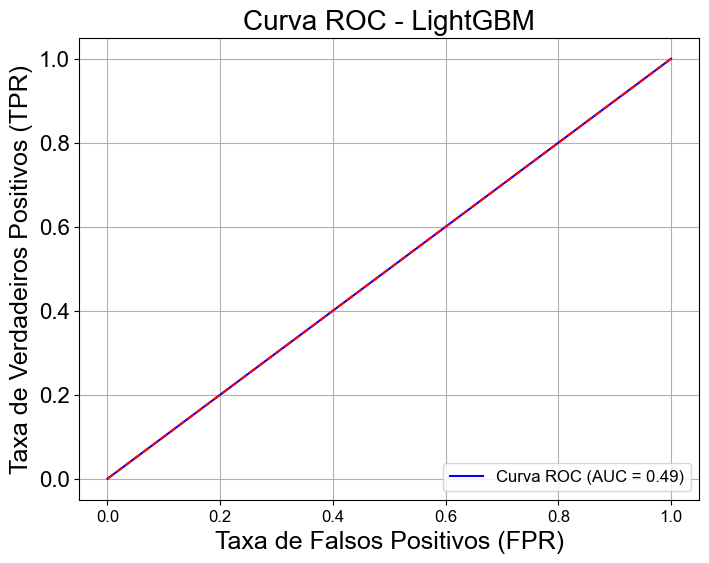

In [512]:
# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(bayes_fpr_lgbm, bayes_tpr_lgbm, color='blue', label=f'Curva ROC (AUC = {auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência (modelo aleatório)
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title(f"Curva ROC - LightGBM")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Importância das variáveis

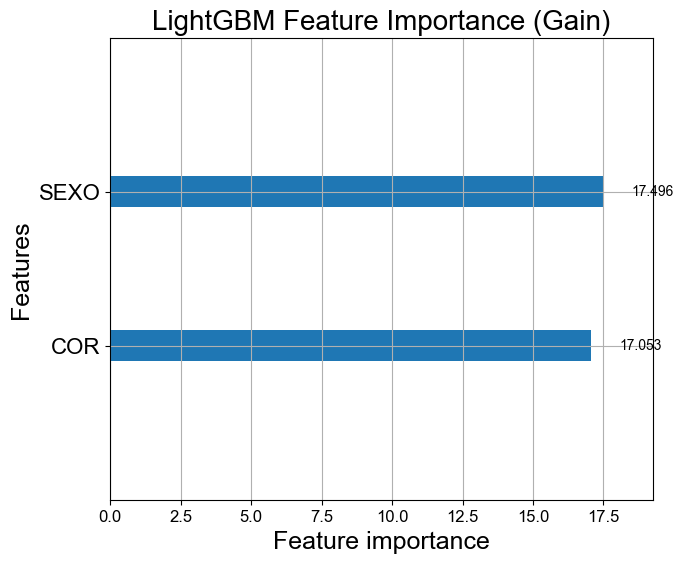

In [513]:
lgbm.plot_importance(best_model_bayes, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

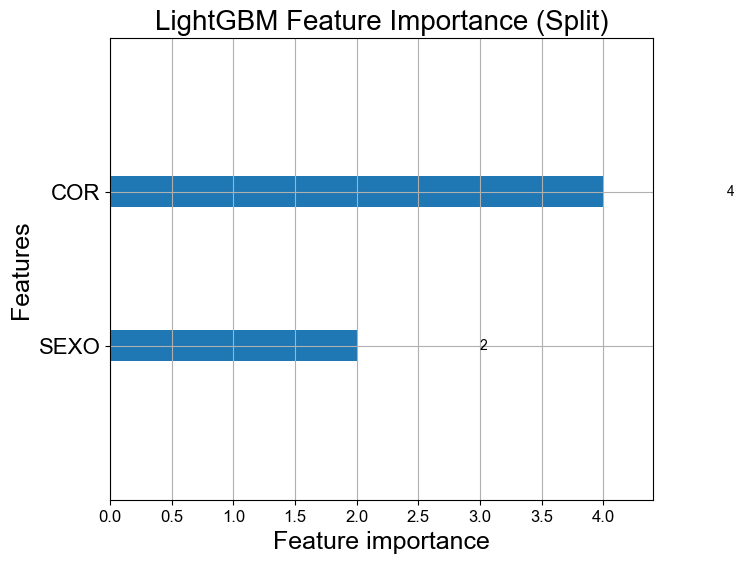

In [514]:
lgbm.plot_importance(best_model_bayes, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()

### SHAP

In [515]:
import shap

In [516]:
explainer_lgbm = shap.TreeExplainer(best_model_bayes)

In [517]:
shap_values_lgbm = explainer_lgbm(X_test)

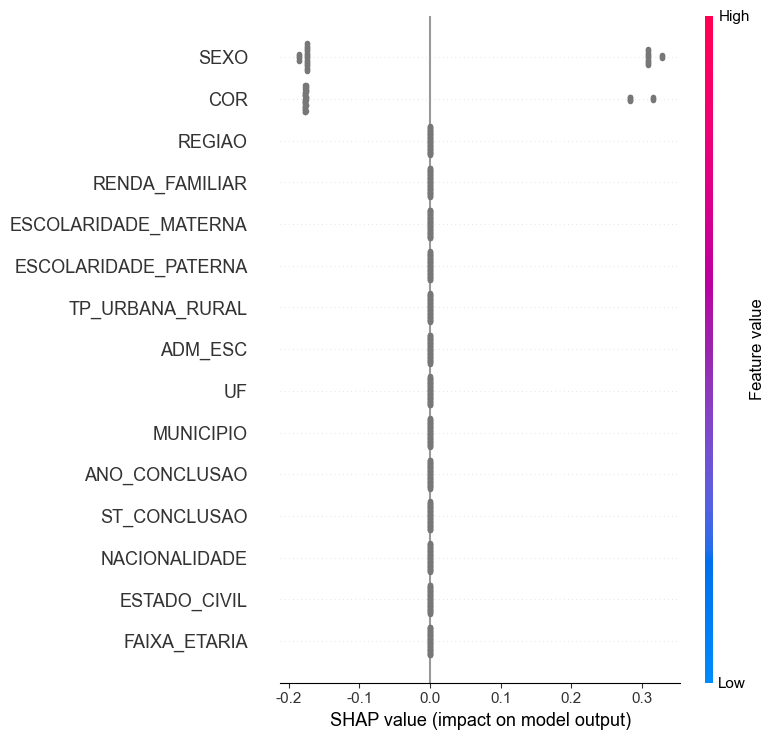

In [518]:
shap.summary_plot(shap_values_lgbm, X_test)


In [519]:
print("Mínimo SHAP:", np.min(shap_values_lgbm.values))
print("Máximo SHAP:", np.max(shap_values_lgbm.values))

Mínimo SHAP: -0.1858459345112527
Máximo SHAP: 0.3284126787938579


## XGBoosting

In [520]:
import xgboost


### Treinando o modelo

In [521]:
colunas=X.columns.to_list()
colunas

['FAIXA_ETARIA',
 'SEXO',
 'ESTADO_CIVIL',
 'COR',
 'NACIONALIDADE',
 'ST_CONCLUSAO',
 'ANO_CONCLUSAO',
 'MUNICIPIO',
 'UF',
 'ADM_ESC',
 'TP_URBANA_RURAL',
 'ESCOLARIDADE_PATERNA',
 'ESCOLARIDADE_MATERNA',
 'RENDA_FAMILIAR',
 'REGIAO']

In [522]:
d_train = xgboost.DMatrix(X_train, label=y_train, feature_names=colunas, enable_categorical=True)
d_test = xgboost.DMatrix(X_test, label=y_test, feature_names=colunas, enable_categorical=True)


In [523]:
# Criando parametros para o modelo
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
}

In [524]:
# Treinando o modelo
model_xg = xgboost.train(
    params,
    d_train,
    5000,
    evals=[(d_test, "test")],
    verbose_eval=10,#era 100
    early_stopping_rounds=20, #para o treino se a métrica de validação não melhorar por n rodadas.
)

[0]	test-logloss:0.49486
[10]	test-logloss:0.49605
[20]	test-logloss:0.49570
[21]	test-logloss:0.49527


In [551]:
pred_xg = model_xg.predict(d_test, output_margin=True)


### Avaliando o modelo

In [ ]:
# Calcular as classificações preditas
y_probs_xg = model_xg.predict(d_test) #Probabilidade de ser classificado como 1
y_pred_xg = (y_probs_xg > 0.5).astype(int) #Se probabilidade >0.5 classifica como 1, senão, como 0


In [566]:
y_pred_xg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [567]:
# Determinando medidas de desempenho do modelo
acuracia_xg = accuracy_score(y_test, y_pred_xg)
precisao_xg = precision_score(y_test, y_pred_xg)
acuracia_balanceada_xg = balanced_accuracy_score(y_test, y_pred_xg)
auc_xg = roc_auc_score(y_test, y_probs_xg)
gini_xg = 2 * auc_xg - 1

c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [568]:
# Adicionando medidas de desempenho no dict_modelos
dict_modelos['Modelo'].append('XGBoost')
dict_modelos['Acuracia'].append(acuracia_xg)
dict_modelos['Acuracia Balanceada'].append(acuracia_balanceada_xg)
dict_modelos['AUC'].append(auc_xg)
dict_modelos['GINI'].append(gini_xg)

In [569]:
pd.DataFrame(dict_modelos)

,Modelo,Acuracia,Acuracia Balanceada,AUC,GINI
0,1ª Random Forest,0.784314,0.563415,0.474390,-0.051220
1,Random Forest Best,0.803922,0.500000,0.495122,-0.009756
2,LightGBM,0.803922,0.500000,0.492683,-0.014634
3,XGBoost,0.803922,0.500000,0.478049,-0.043902
4,XGBoost,0.803922,0.500000,0.478049,-0.043902


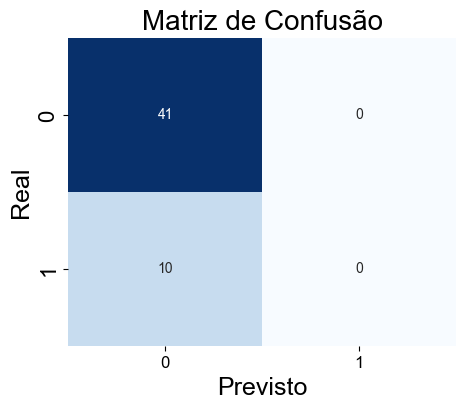

In [570]:
# Matriz de confusão
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### Curva ROC XGBoost

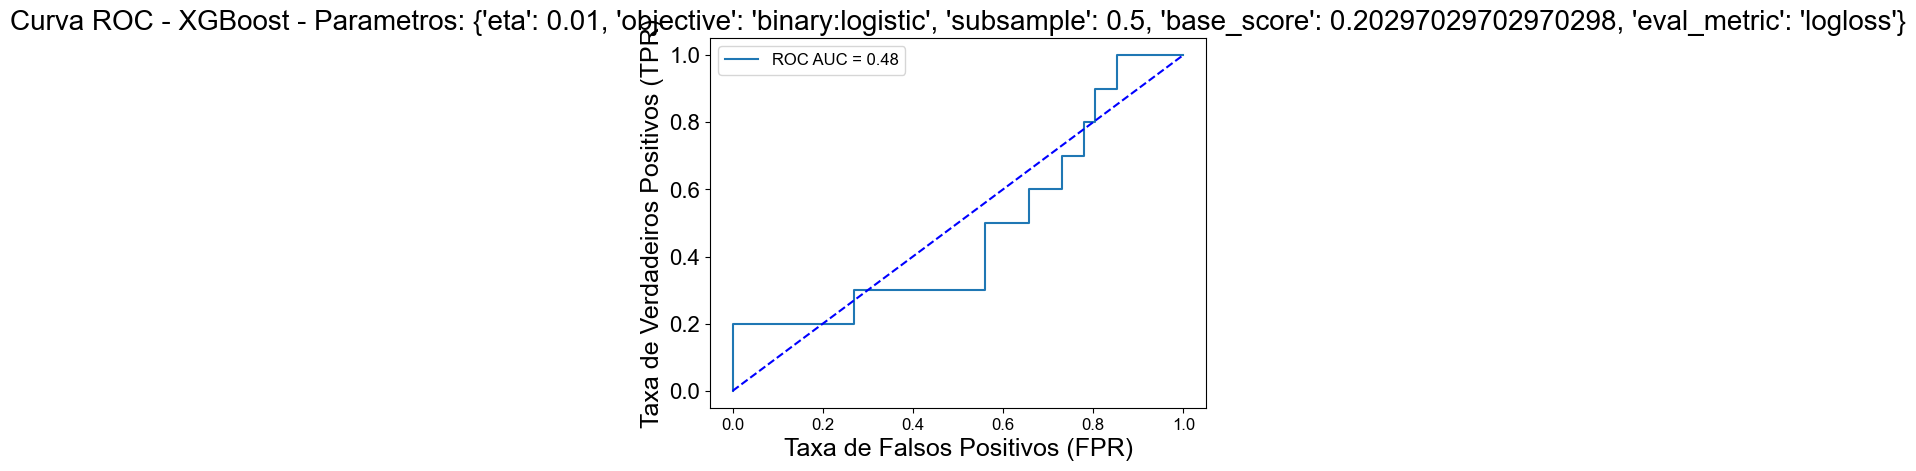

In [571]:
# Curva Roc XGBoost
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_probs_xg)
roc_auc_xg = roc_auc_score(y_test, y_probs_xg)
plt.plot(fpr_xg, tpr_xg, label=f"ROC AUC = {roc_auc_xg:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="blue")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title(f"Curva ROC - XGBoost - Parametros: {params}")
plt.legend()
plt.show()

In [533]:
print("Acurácia XGBoost:", accuracy_score(y_test, y_pred_xg))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_xg))

Acurácia XGBoost: 0.803921568627451

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        41
           1       0.00      0.00      0.00        10

    accuracy                           0.80        51
   macro avg       0.40      0.50      0.45        51
weighted avg       0.65      0.80      0.72        51



c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\prisc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### GridSearch

Exemplo:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Definir o grid de parâmetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Configurar o GridSearchCV
grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    cv=3,          # 3-fold cross-validation
                    scoring='accuracy',
                    verbose=1,
                    n_jobs=-1)     # usa todos os núcleos disponíveis

# Executar a busca
grid.fit(X_train, y_train)

# Mostrar os melhores parâmetros
print("Melhores parâmetros:", grid.best_params_)

# Avaliar no conjunto de teste
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))

In [601]:
param_grid_xg= {"eta": [0.01],
    "objective": ["binary:logistic"],
    "subsample": [0.5],
    "base_score": [np.mean(y_train)],
    "eval_metric": ["logloss"],
}

NameError: name 'XGClassifier' is not defined

In [603]:
grid_search_xg.fit(X_train, y_train)

ValueError: Invalid parameter 'base_score' for estimator RandomForestClassifier(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

### Importância das variáveis

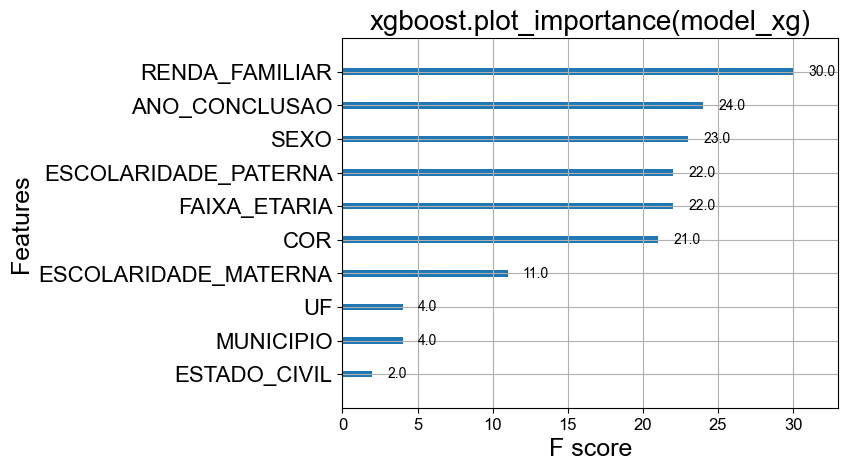

In [534]:
# Importancia das variáveis
xgboost.plot_importance(model_xg, max_num_features=10)
plt.title("xgboost.plot_importance(model_xg)")
plt.show()

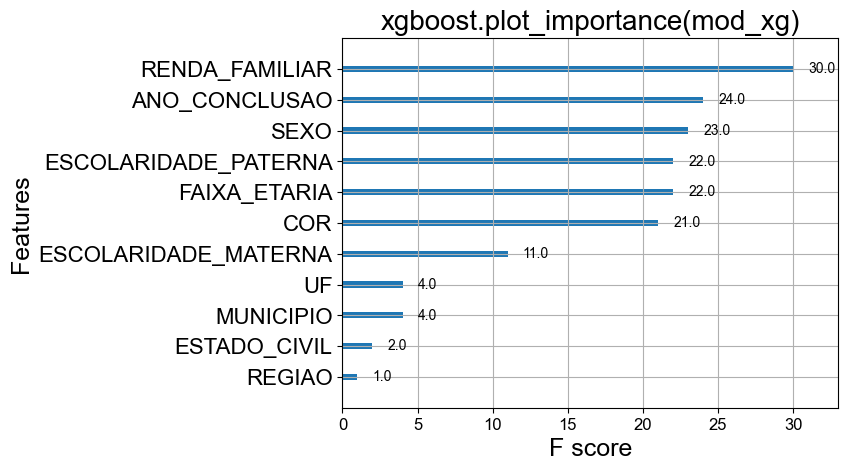

In [535]:
import matplotlib.pylab as pl
xgboost.plot_importance(model_xg)
pl.title("xgboost.plot_importance(mod_xg)")
pl.show()

### Shapley

In [536]:
import shap
shap.initjs()

In [537]:
explainer_xg = shap.TreeExplainer(model_xg)

In [538]:
explanation_xg = explainer_xg(d_test)


In [539]:
print(explanation_xg)

.values =
array([[-2.73421104e-03, -2.24302104e-03,  0.00000000e+00,
        -5.08871069e-03,  0.00000000e+00,  0.00000000e+00,
        -3.37467209e-04, -9.79525736e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.09758612e-03, -6.34063920e-03,  0.00000000e+00],
       [-2.73421104e-03, -2.24302104e-03,  0.00000000e+00,
        -3.71524692e-03,  0.00000000e+00,  0.00000000e+00,
        -3.37467209e-04, -9.79525736e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.32143163e-04, -6.48437394e-03,  0.00000000e+00],
       [ 2.06750724e-03,  1.22186542e-02,  0.00000000e+00,
        -1.54227263e-03,  0.00000000e+00,  0.00000000e+00,
         9.74782393e-04, -3.78318742e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -7.77985479e-05,  3.47516872e-02,  0.00000000e+00],
       [ 1.88590540e-03, -1.22170402e-02,  0.00000000e+00,
        -1.56243274e-03,  0.00000000e+00,  

In [540]:
shap_features=explanation_xg.feature_names

In [541]:
shap_values = explanation_xg.values

In [542]:
np.abs(shap_values.sum(axis=1) + explanation_xg.base_values - pred_xg).max()


0.22893393

In [543]:
explanation_xg.feature_names = X.columns

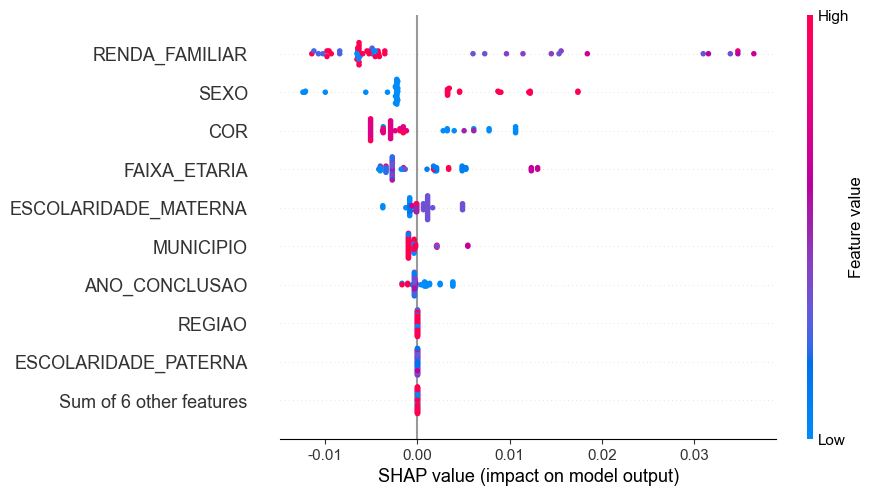

In [544]:
#Qual impacto cada variável tem na saída do modelo para indivíduos no conjunto de dados de validação
shap.plots.beeswarm(explanation_xg)

 Observe pelo gráfico anterior que a renda familiar afeta muito modelo. No entanto, não há tantas observações em que a renda familiar teve tanta importância para classificá-lo. O município e  a conclusão do ensino médio afetam muito pouco o modelo. 

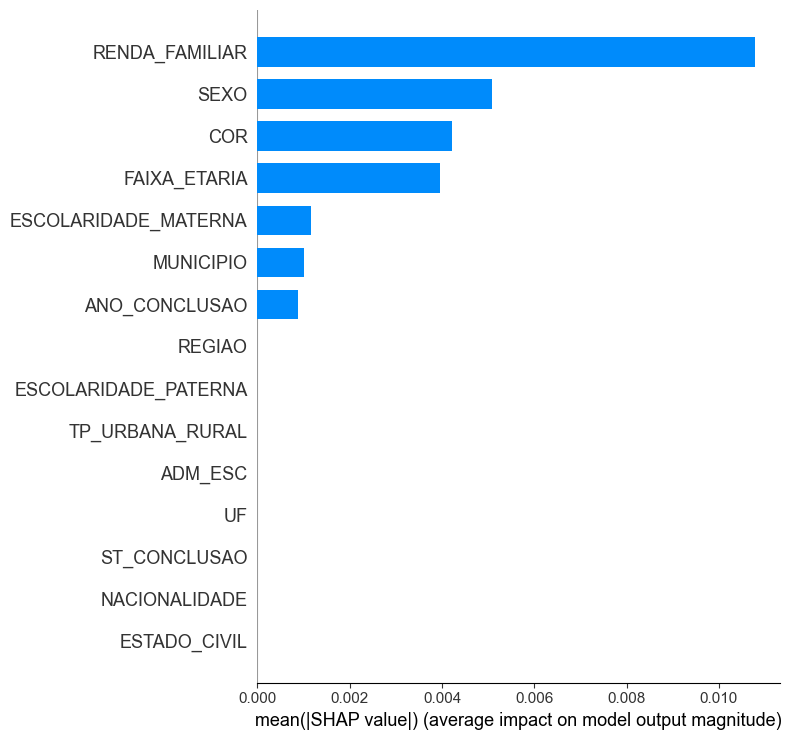

In [545]:
shap.summary_plot(shap_values, X, plot_type="bar")